## I - Exploratory Data Analysis  

### Starting the EDA

### 1. Import libraries

In [1]:
!pip install -q seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile

### 2. Load Dataset and distinguish attributes

##### 2.1 - Visually inspecting the dataset

In [3]:
zf = zipfile.ZipFile('../1_Classification/Bank_Marketing/Bank_Dataset/bank-additional-full.zip')
df = pd.read_csv(zf.open('bank-additional-full.csv'), sep = ';' )
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

##### 2.2 - Checking columns and data types

In [4]:
# df.columns
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### 2.3 - Checking basic statistics - first insight on distributions

In [5]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

##### At this moment, you look for columns that shall be transformed/converted later in the workflow.

In [6]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index([], dtype='object')


### 3. Check for missing values

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It seems there are no missing values, but that may be misleading. Let's explore a bit more:

In [8]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

There are null values in our dataset in form of ‘unknown’. Pandas is not recognizing them so we will replace them with [`np.nan`](https://numpy.org/doc/stable/reference/constants.html#numpy.nan).

In [9]:
for col in df.columns:
    df[col].replace({'unknown': np.nan},inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

C:\Users\vbr6930\AppData\Local\Temp\ipykernel_30280\3719739586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'unknown': np.nan},inplace=True)


In [10]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [11]:
col_with_null = []
for i in df.columns:
    nulls_cnt = round(df[i].isnull().sum()/df.shape[0]*100, 2)
    print(i,'\t', nulls_cnt)
    if nulls_cnt > 0:
        col_with_null.append(i)

age 	 0.0
job 	 0.8
marital 	 0.19
education 	 4.2
default 	 20.87
housing 	 2.4
loan 	 2.4
contact 	 0.0
month 	 0.0
day_of_week 	 0.0
duration 	 0.0
campaign 	 0.0
pdays 	 0.0
previous 	 0.0
poutcome 	 0.0
emp.var.rate 	 0.0
cons.price.idx 	 0.0
cons.conf.idx 	 0.0
euribor3m 	 0.0
nr.employed 	 0.0
y 	 0.0


'default' column has the hightest number of nulls. Calculate how many records are nulls in each column compare to the total number of rows

#### 3.1 Visualizing the missing values  

<Axes: >

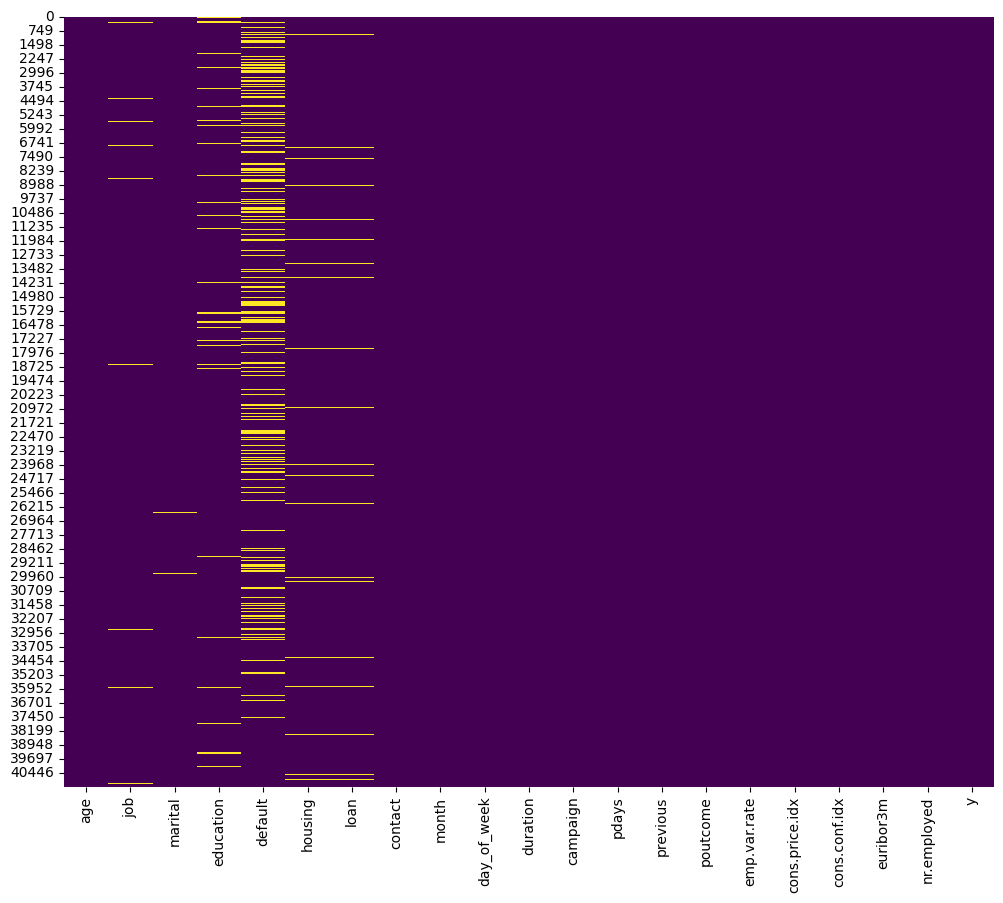

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

Now observe that there are many missing values in 'default' while other columns have fewer missing values. We can’t drop the 'default' column as it may be important for our prediction.  
We can also use the [**missingno**](https://github.com/ResidentMario/missingno) libray for a better evaluation of the missing values. First we can check the quantity and how they distribute among the rows:

In [13]:
!pip install -q missingno

In [14]:
import missingno as msno

<Axes: >

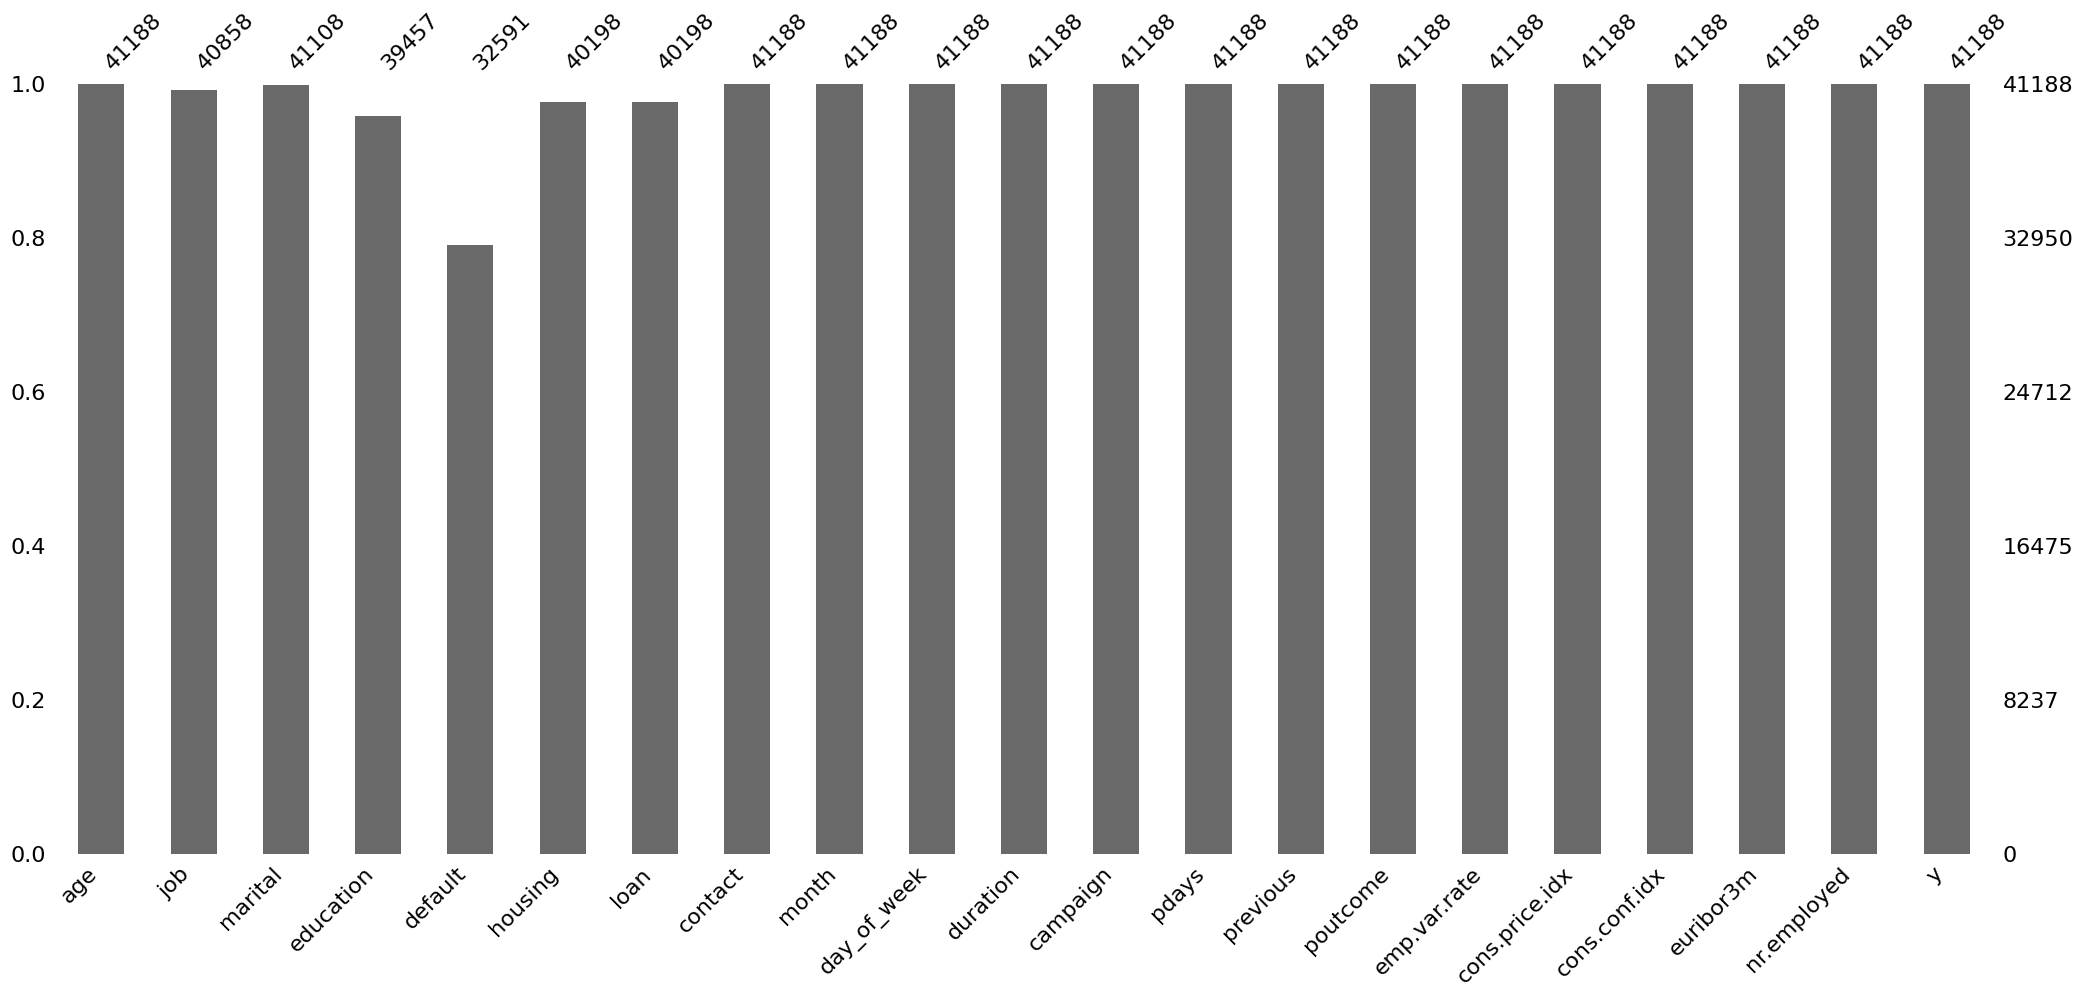

In [15]:
msno.bar(df)

<Axes: >

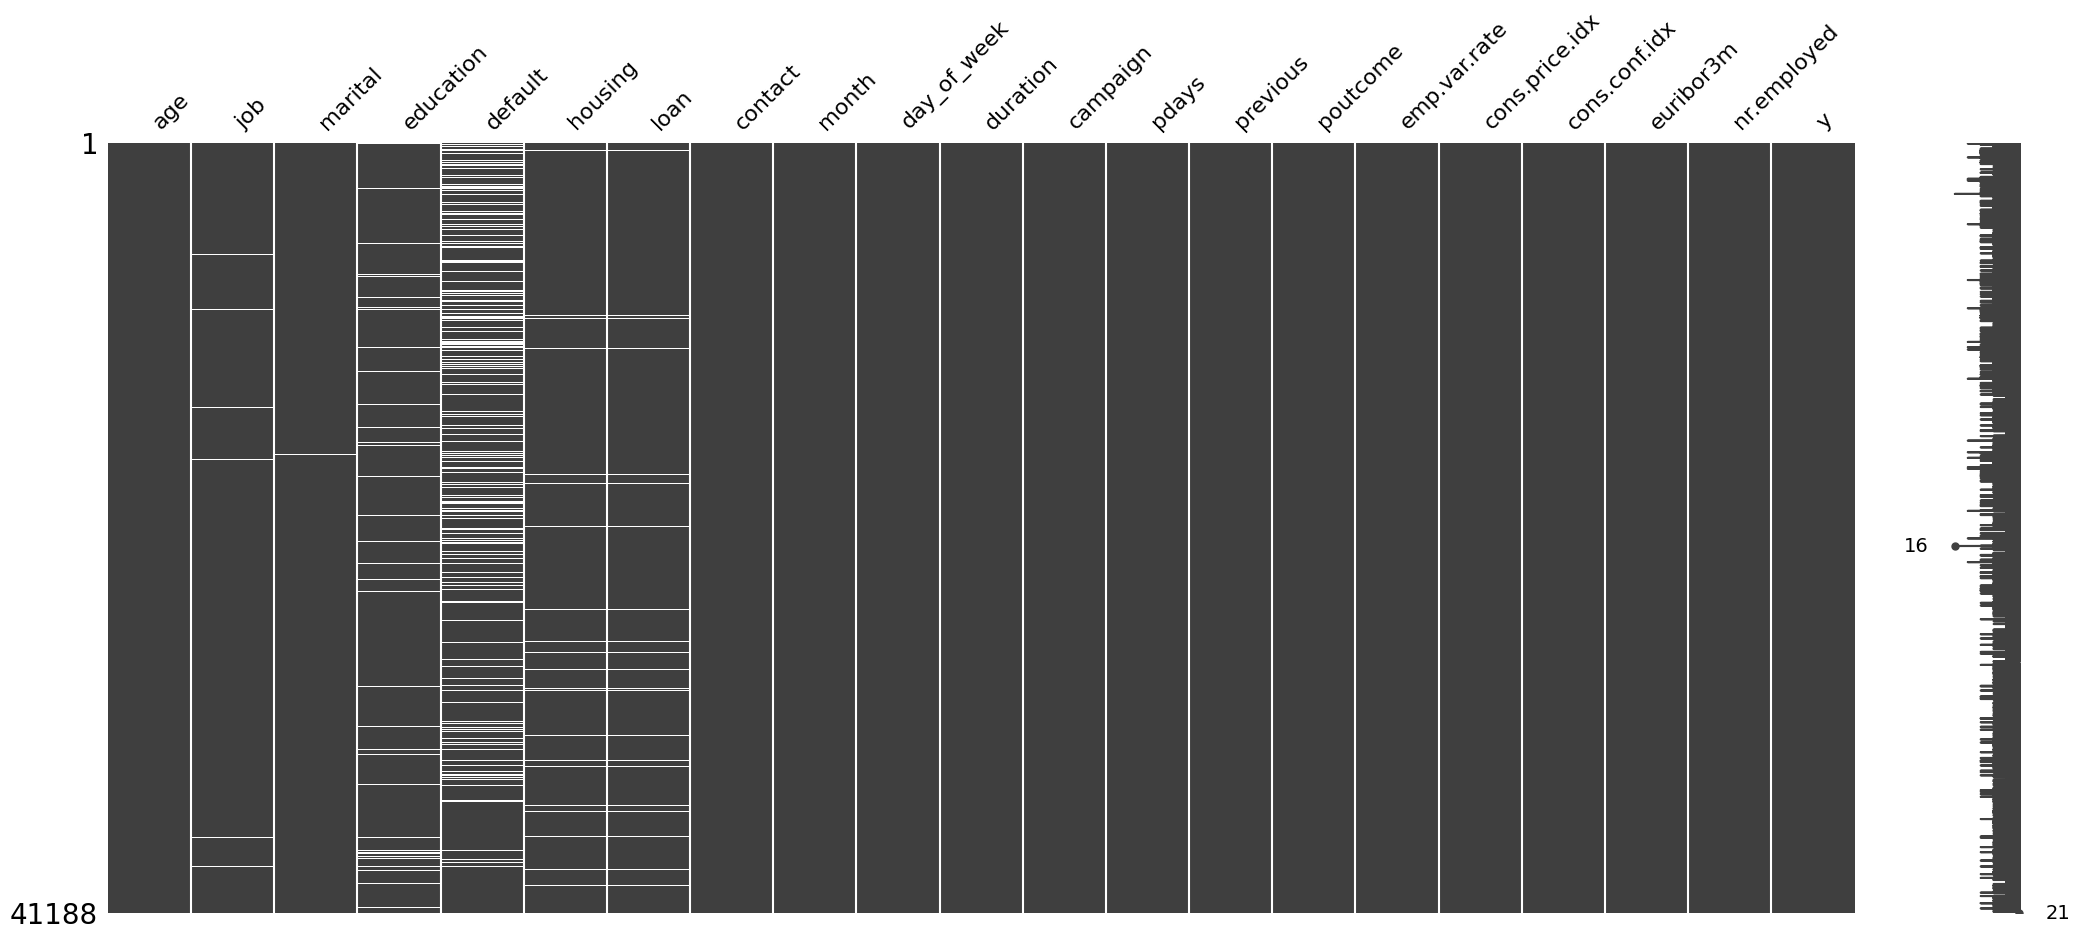

In [16]:
msno.matrix(df)

The missingno [correlation heatmap](https://github.com/ResidentMario/missingno?tab=readme-ov-file#heatmap) measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

<Axes: >

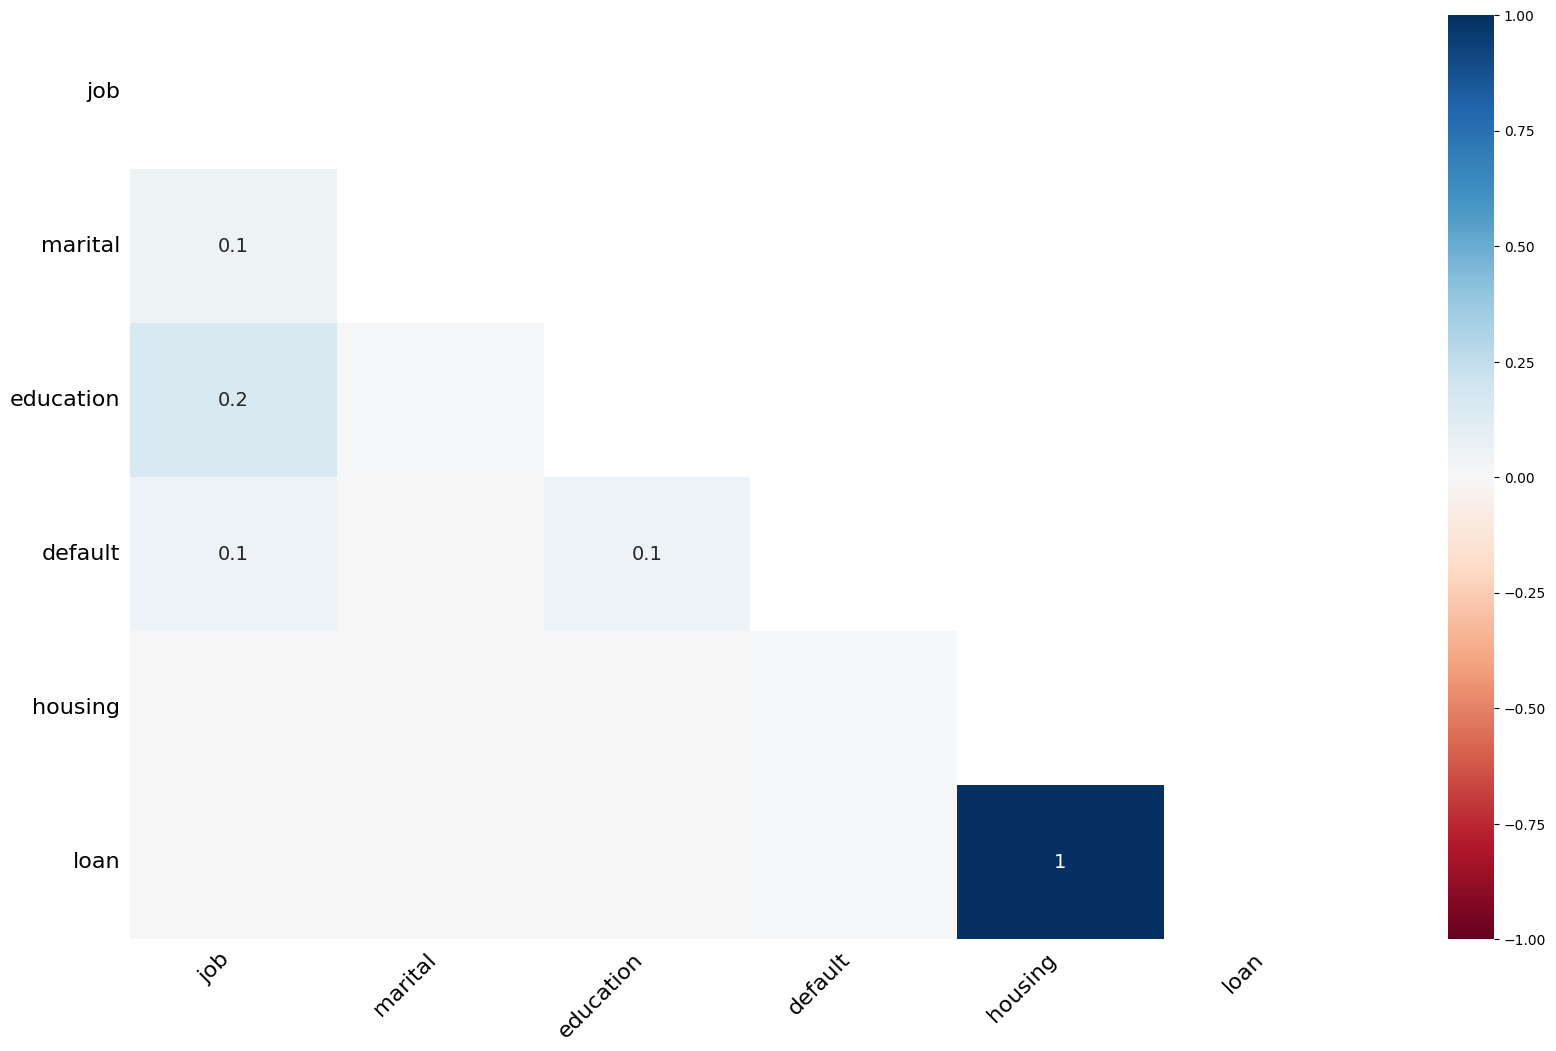

In [17]:
msno.heatmap(df)

'Housing' nulls are fully correlated with 'loan's nulls.

#### 3.2. Replacing the missing values
How to raplace 'default' nulls with values? it is quite difficult to figure out. The percentage of nulls is too big to completely delete rows. But it is categorical column. Don't think median will be fine for this perpose

In [18]:
df.default.value_counts()

default
no     32588
yes        3
Name: count, dtype: int64

It sounds really suspicious that in a small dataset, there is only 3 records marked as 'yes' in the default column. Unknown = yes? On the other hand, does this column impacts on our target - almost all values are 'no'?

In [19]:
df.select_dtypes(include='number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [20]:
df.select_dtypes(include='object').head()

job  marital    education default housing loan    contact month  \
0  housemaid  married     basic.4y      no      no   no  telephone   may   
1   services  married  high.school     NaN      no   no  telephone   may   
2   services  married  high.school      no     yes   no  telephone   may   
3     admin.  married     basic.6y      no      no   no  telephone   may   
4   services  married  high.school      no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [21]:
df.describe(include = [object])

job  marital          education default housing   loan   contact  \
count    40858    41108              39457   32591   40198  40198     41188   
unique      11        3                  7       2       2      2         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [22]:
print(col_with_null)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [23]:
#filling with mode for education column
df.default.fillna(df['education'].mode(), inplace=True)
df.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [24]:
#Missing data not at random. filling difault with 'missing'. just my assumption about not filling that 
#data in because people don't want to when the answer is yes:)
df.default.fillna('missing', inplace=True)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  missing      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [25]:
#for other columns just deleting rows with nulls
df.dropna(subset = ['job', 'marital', 'housing', 'loan'], inplace = True)

In [26]:
df.shape

(39803, 21)

Checking for duplicates

In [27]:
df.duplicated().sum()

12

In [28]:
df.drop_duplicates(inplace=True)

### 4. Checking Data Distributions

#### 4.1 Univariate Analysis  

In [29]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

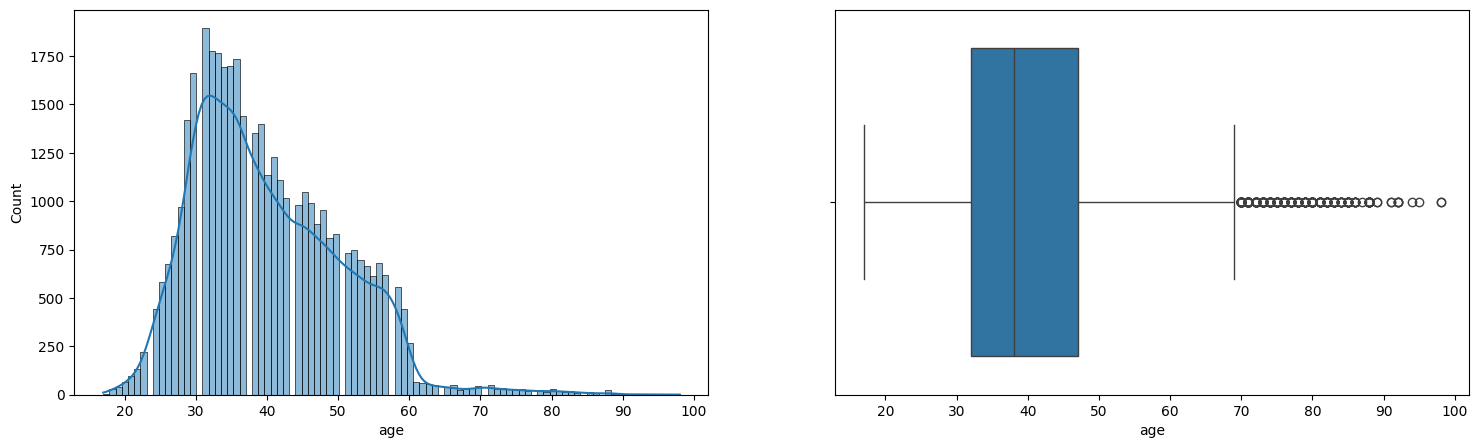

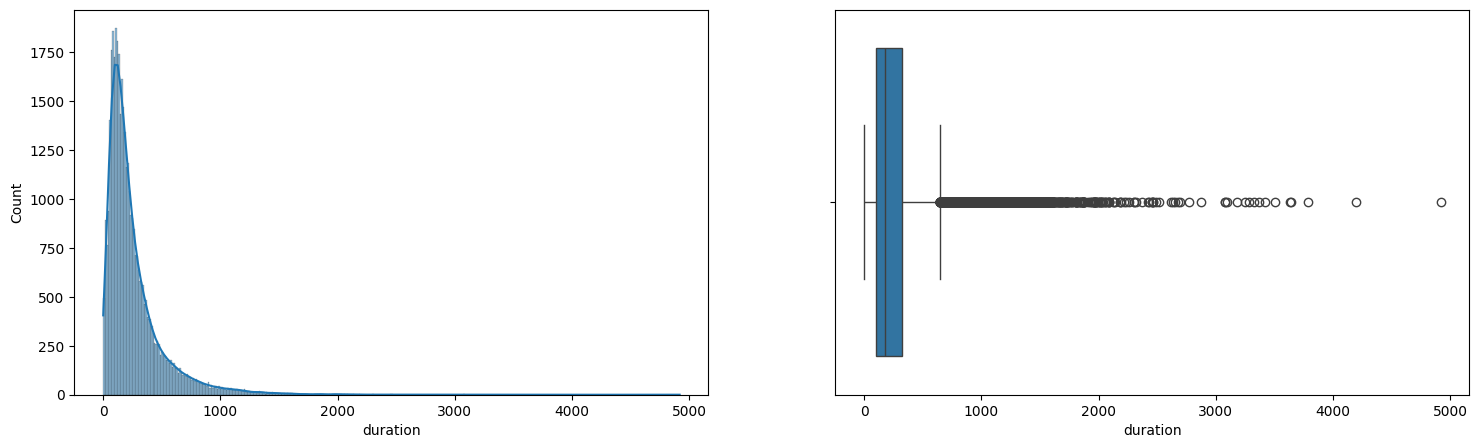

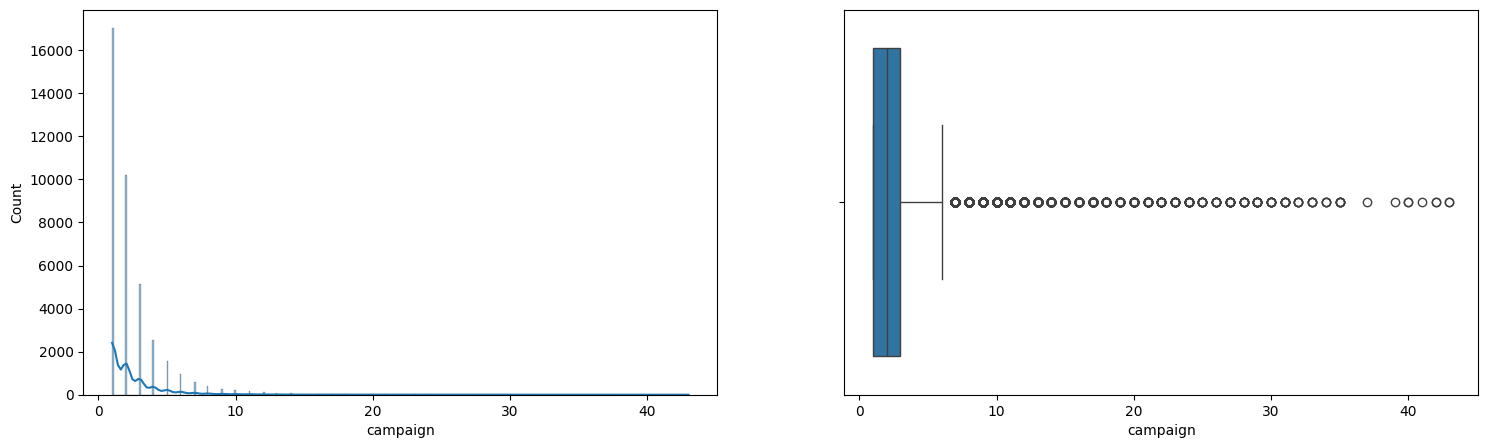

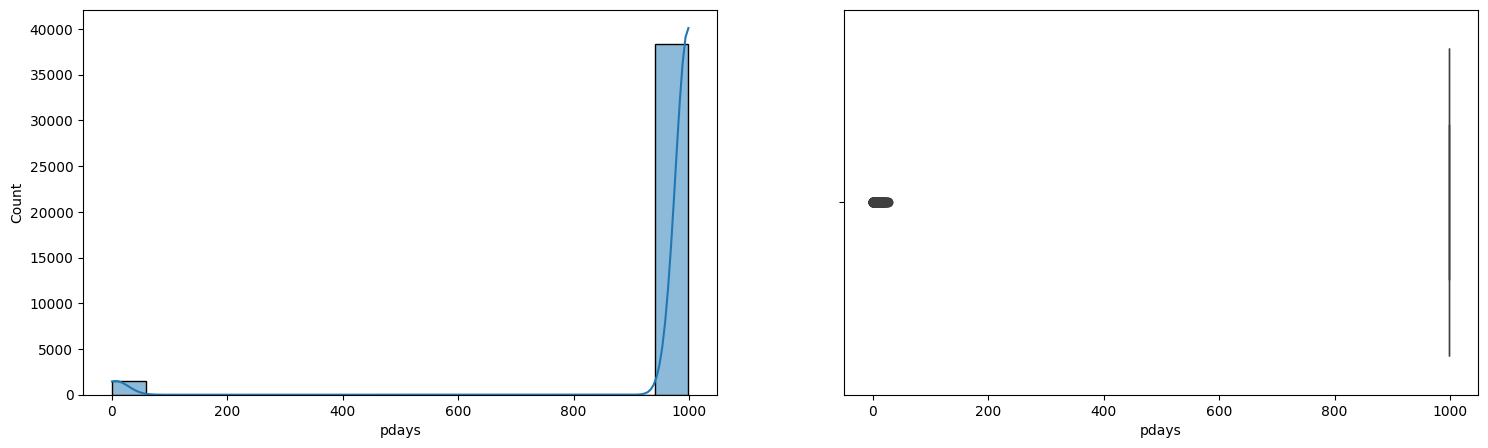

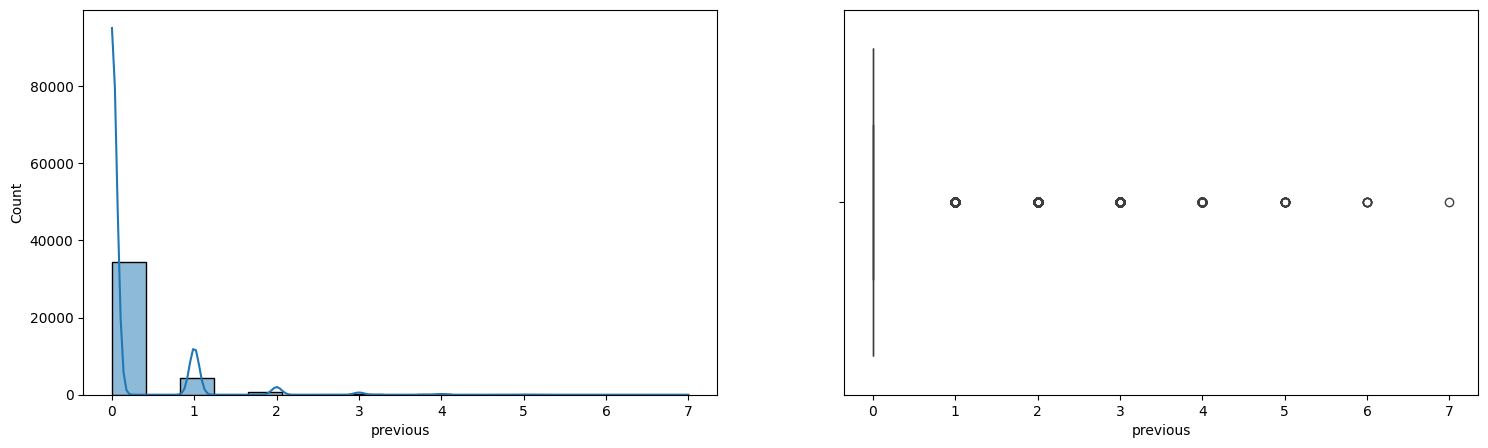

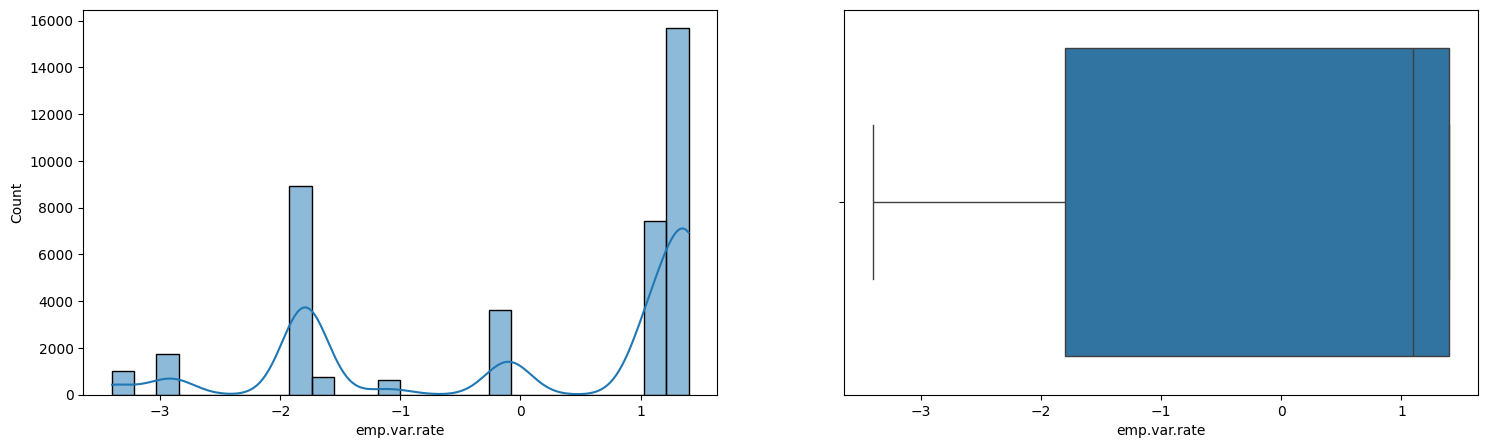

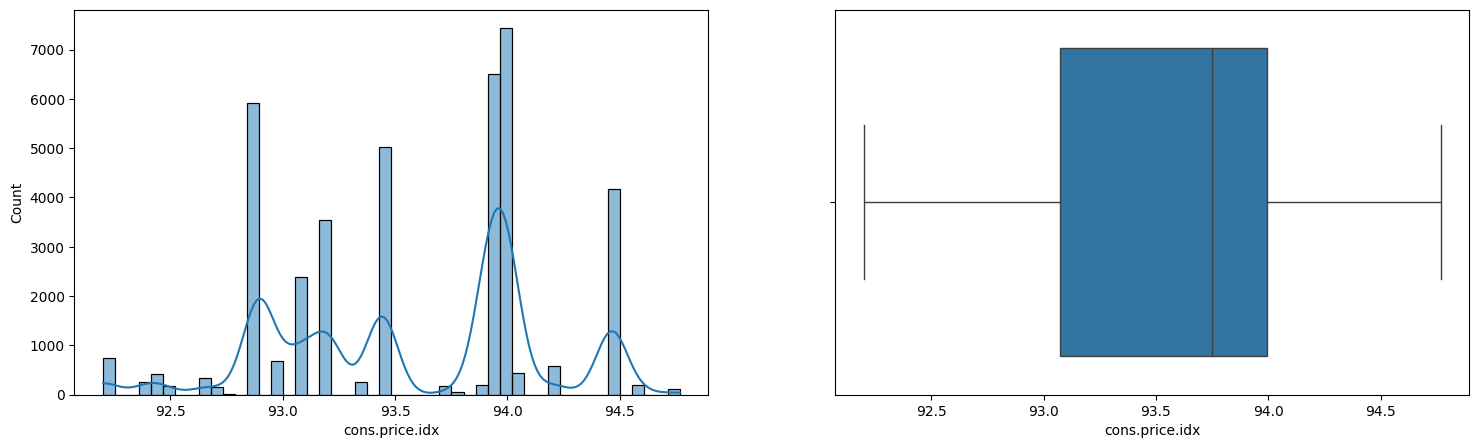

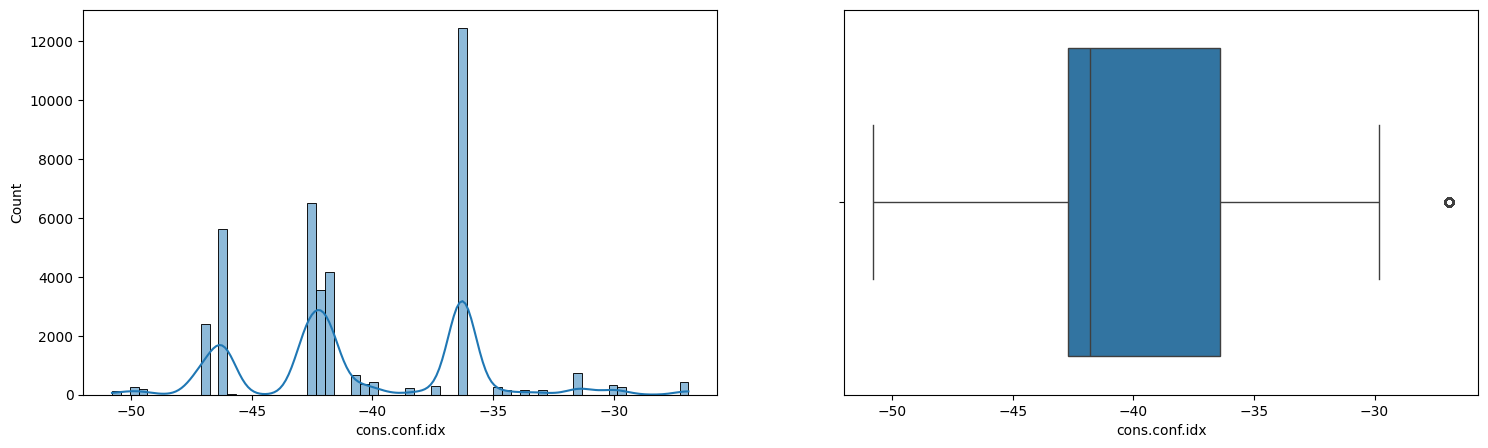

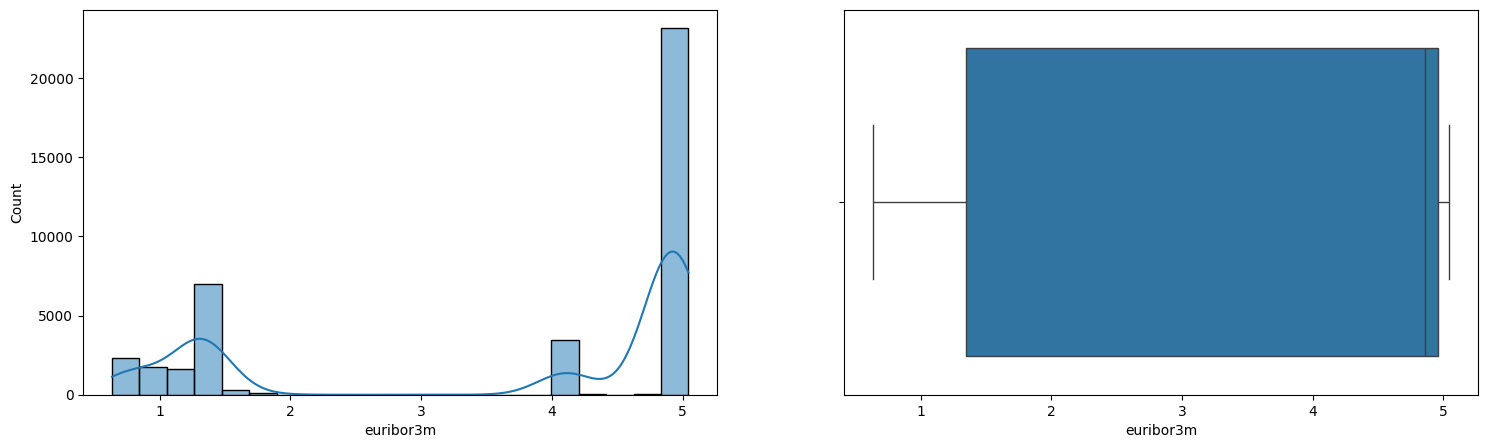

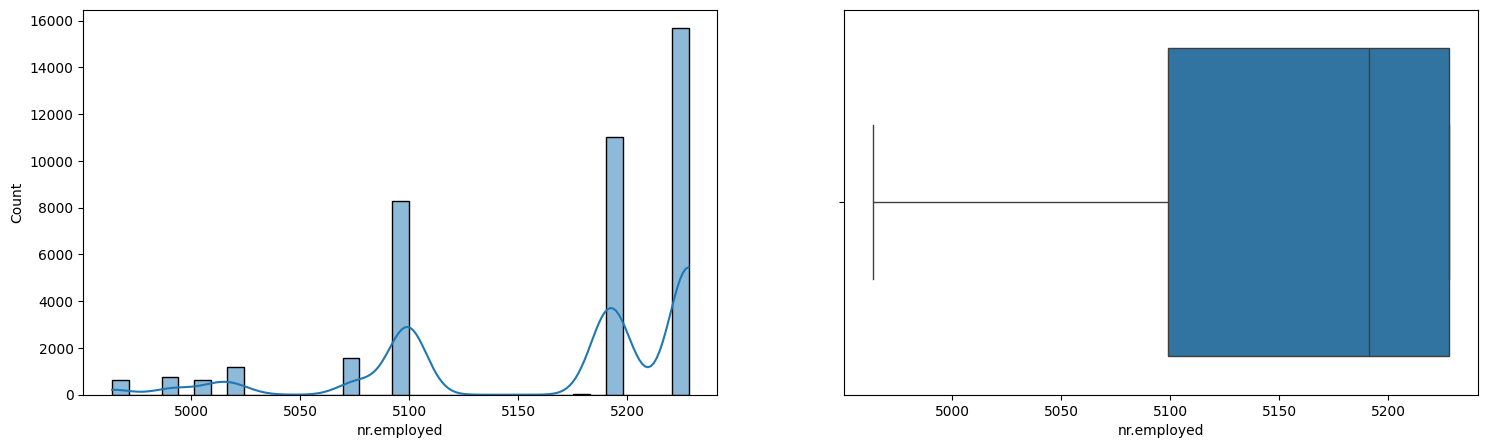

In [30]:
for col in numeric_cols:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

We should take a look at columns duration(delete records where duration=0 - no call, and y = 'no') and pdays(what to do with 999(client was not previously contacted)).

In [31]:
df = df[df['duration'] > 0] #deleting records with duration=0 

In [32]:
df.shape

(39787, 21)

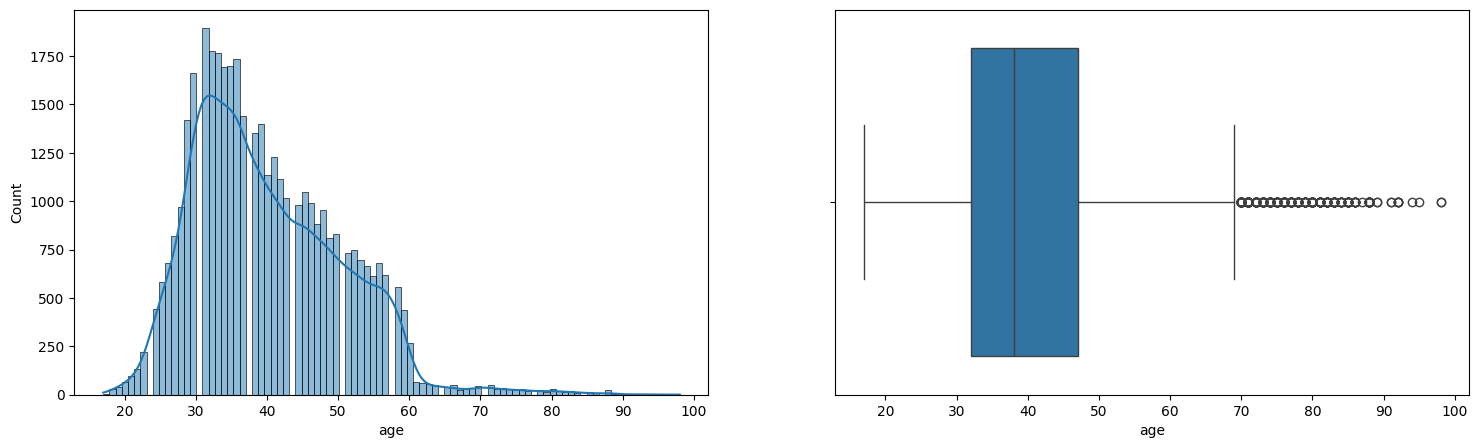

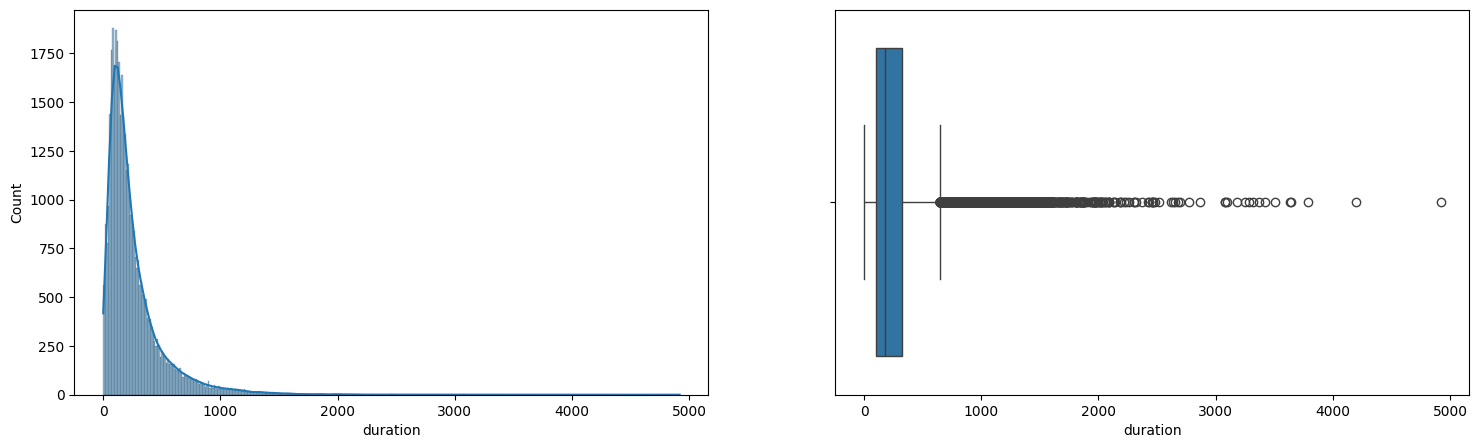

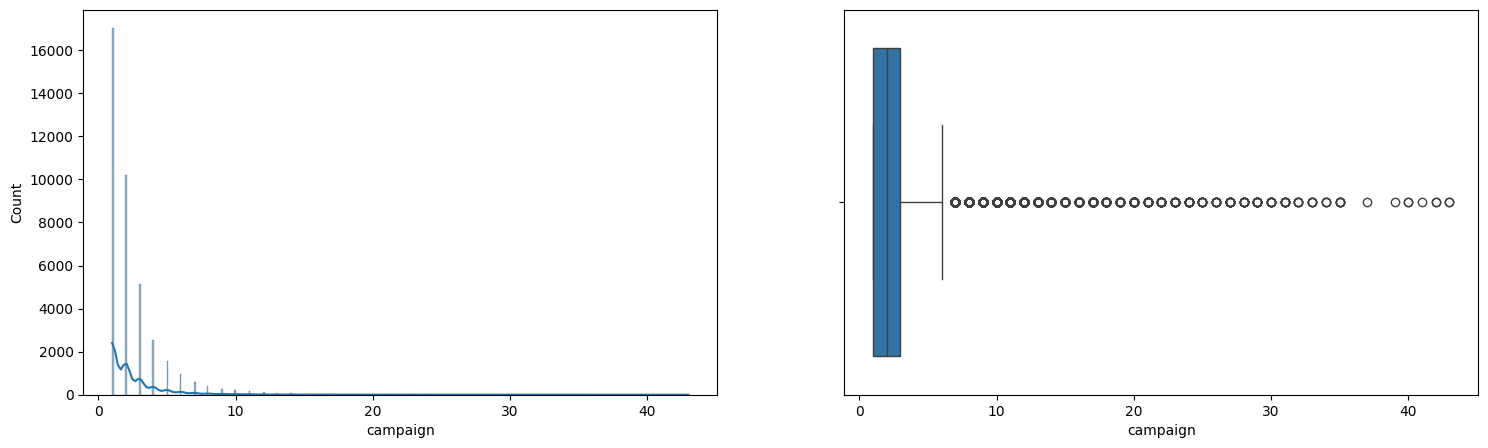

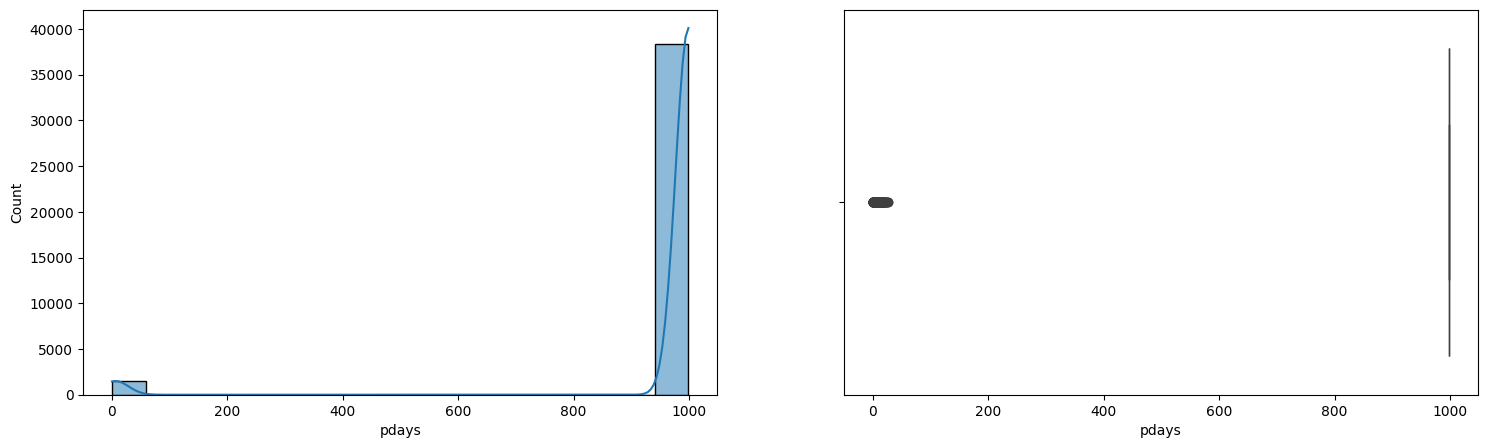

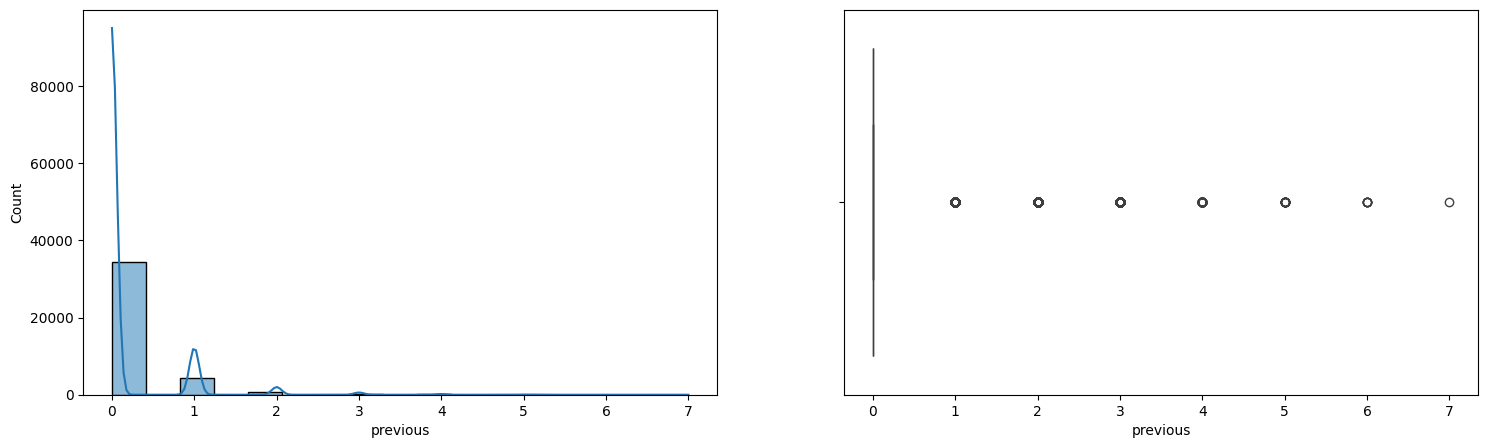

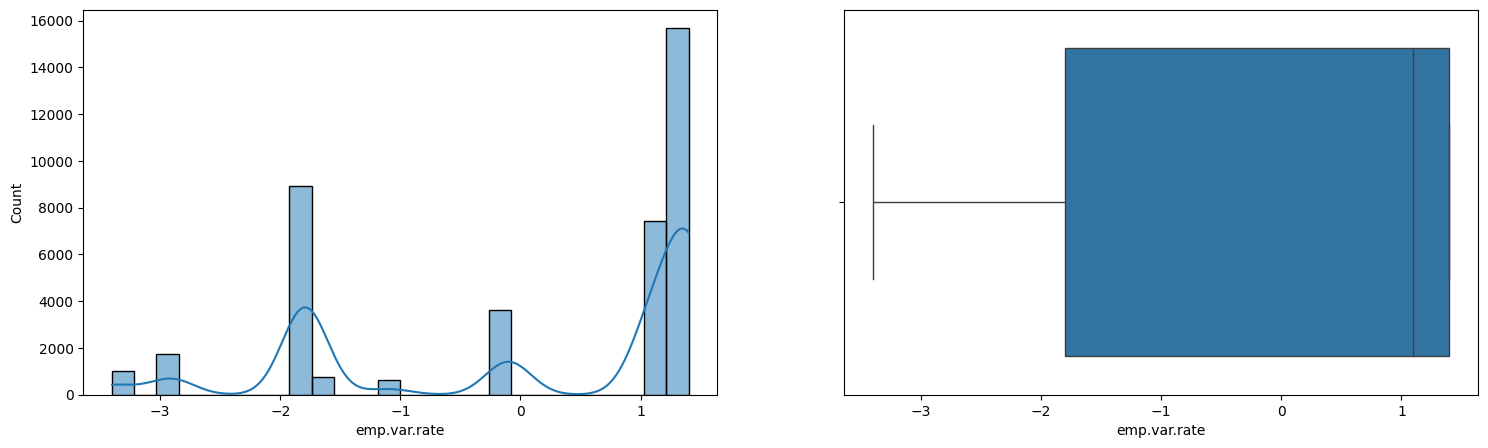

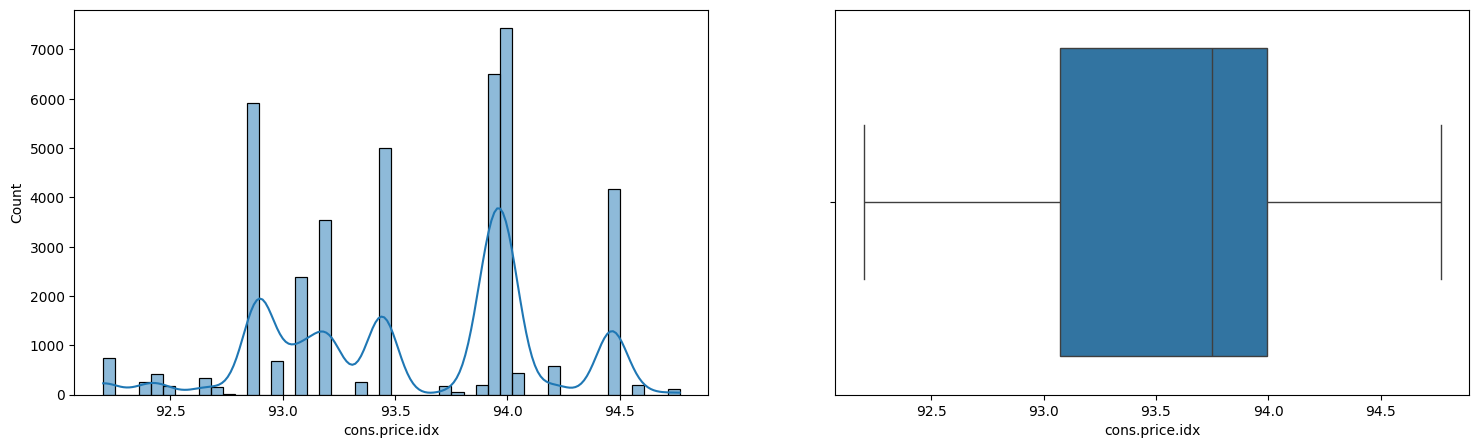

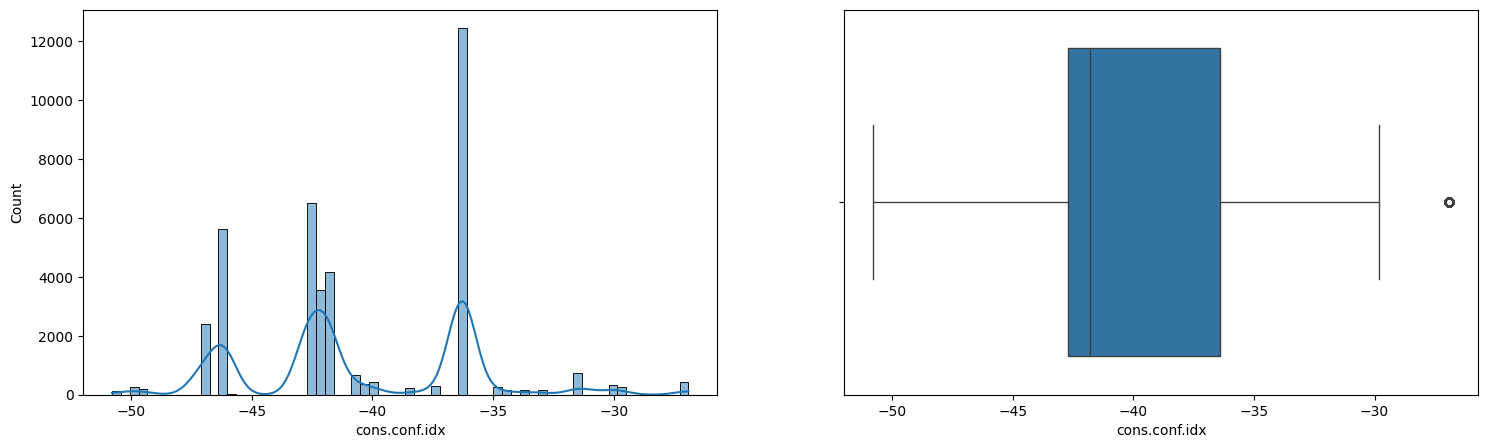

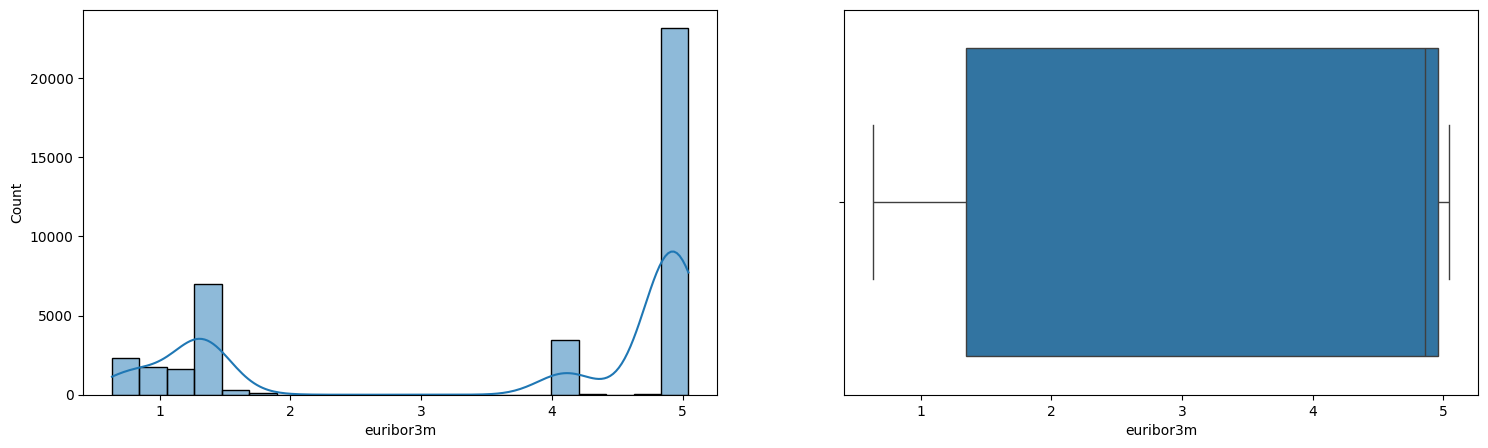

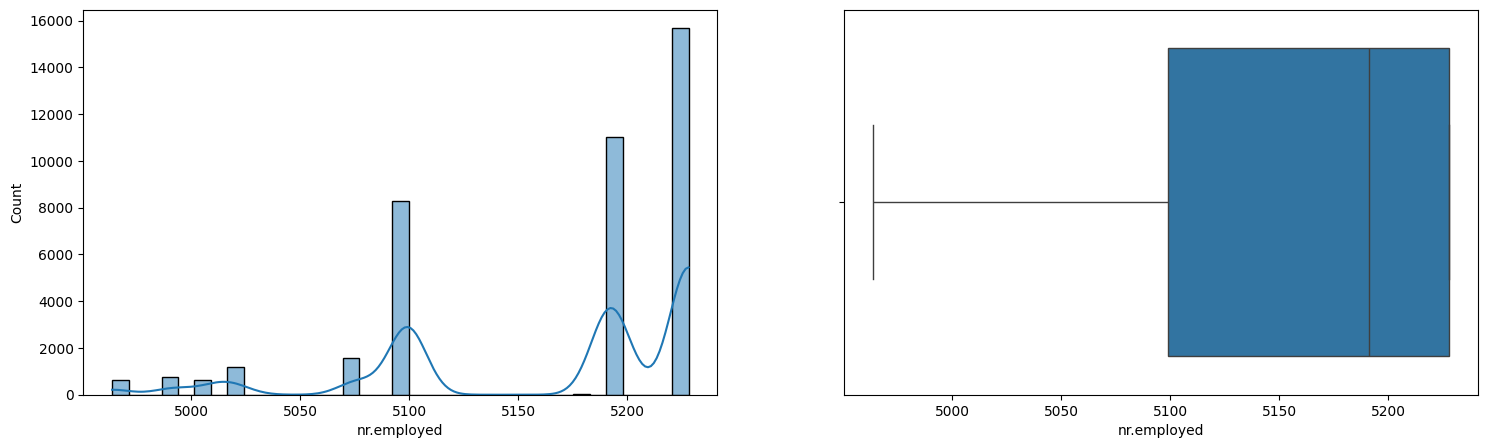

In [33]:
for col in numeric_cols:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

<Axes: xlabel='previous'>

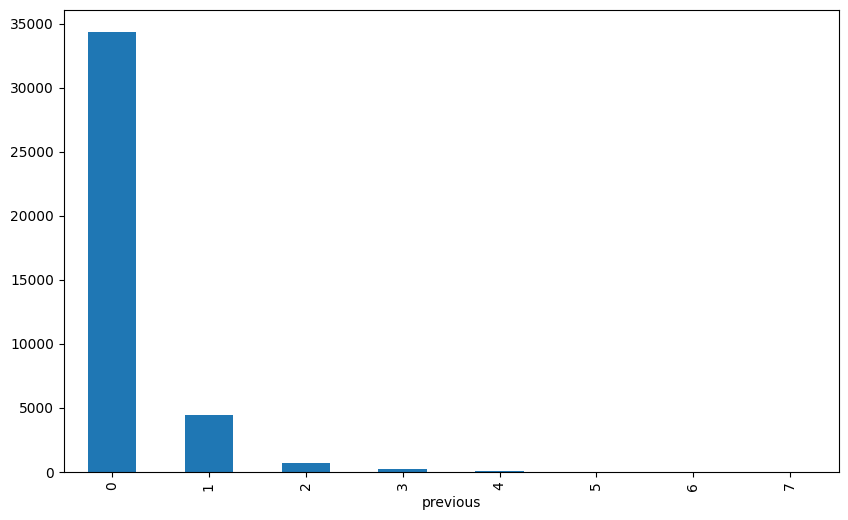

In [34]:
df['previous'].value_counts().plot(kind="bar", figsize=(10,6))

<Axes: xlabel='pdays'>

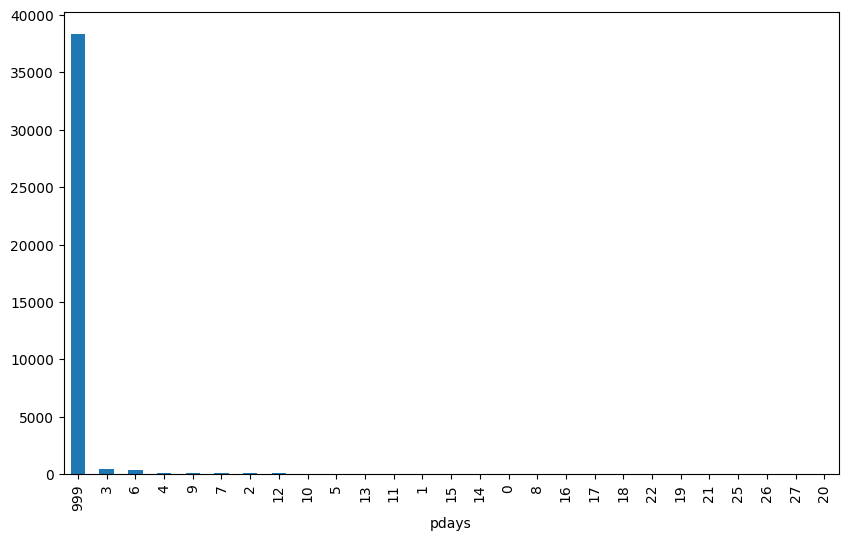

In [35]:
df['pdays'].value_counts().plot(kind="bar", figsize=(10,6))

Would it be better to replace 999 with -1?

In [36]:
df['pdays'] = df['pdays'].replace(999, -1) 

Or, maybe it is better to convert the column to categorical column whit values:

In [37]:
# Binning the data
bins = [-1, 0, 7, 14, 30]  # Example bins
labels = ['Never contacted', 'Last week', 'Last 2 weeks', 'Last month']
df['pdays_binned'] = pd.cut(df['pdays'], bins=bins, labels=labels, include_lowest=True)

<Axes: xlabel='pdays_binned', ylabel='count'>

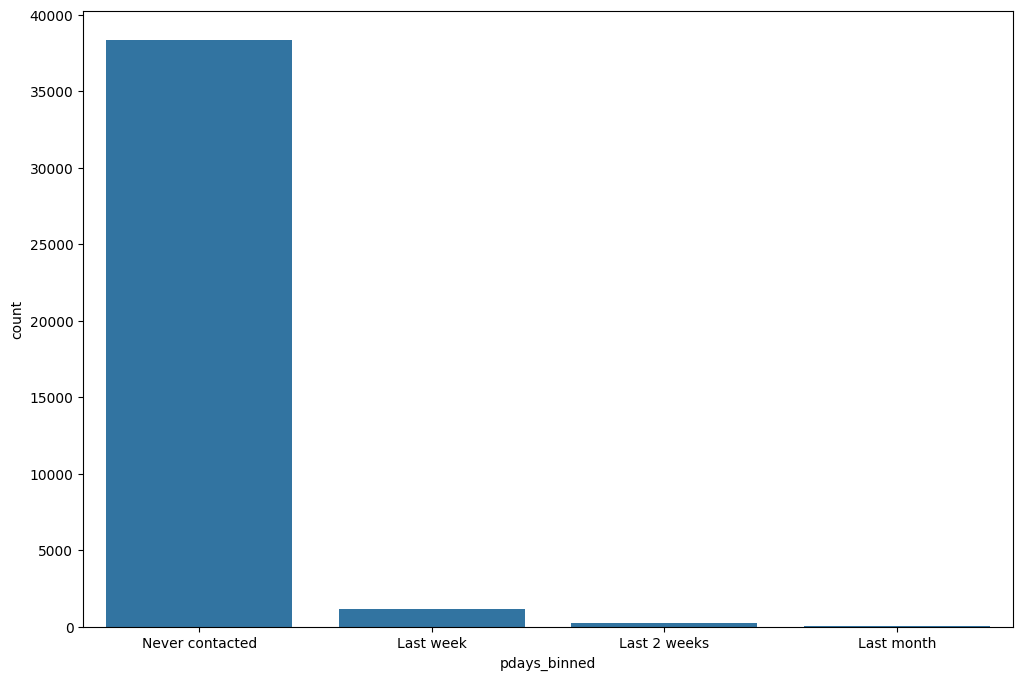

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
order = df['pdays_binned'].value_counts().index
sns.countplot(df, x="pdays_binned", order=order)

<Axes: xlabel='poutcome'>

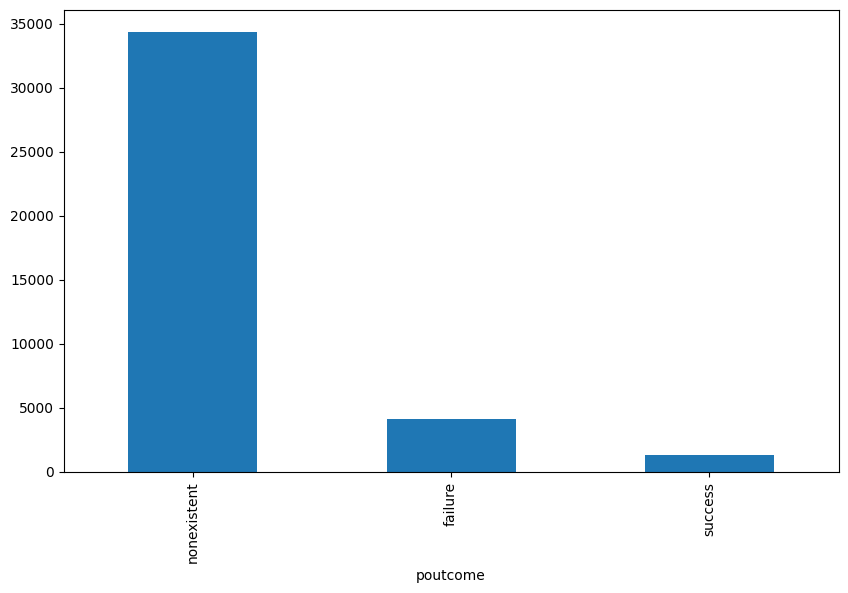

In [39]:
df["poutcome"].value_counts().plot(kind="bar", figsize=(10,6))

<Axes: xlabel='default'>

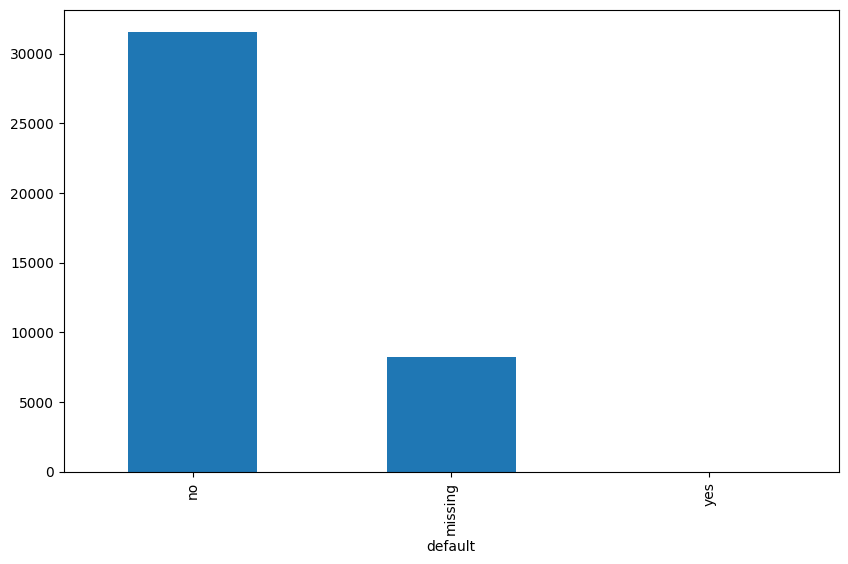

In [40]:
df['default'].value_counts().plot(kind="bar", figsize=(10,6))

The majority of clients was not contacted before this compaing. Therefore for all of them we have 999 in column 'pdays'. 'default' column is not also realy informative. Drop these columns?

Let's take a look at some distributions more in detail

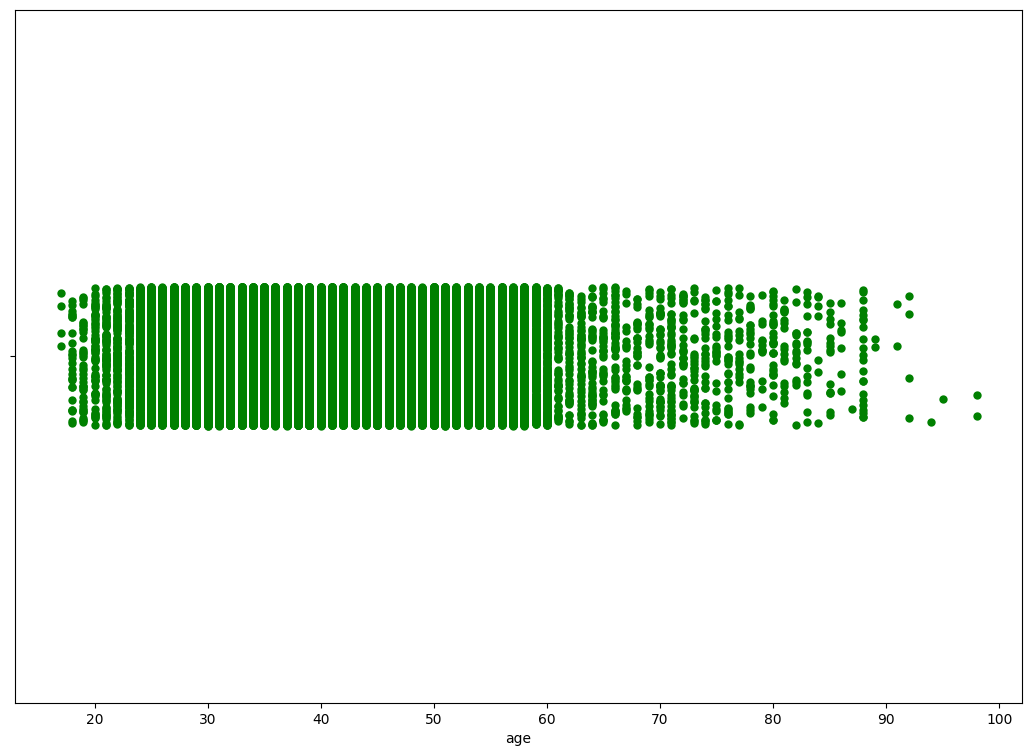

In [41]:
plt.figure(figsize=(13,9))
sns.stripplot(data = df, 
              x = 'age', 
              color = 'green', 
              jitter = True, 
              size = 6);

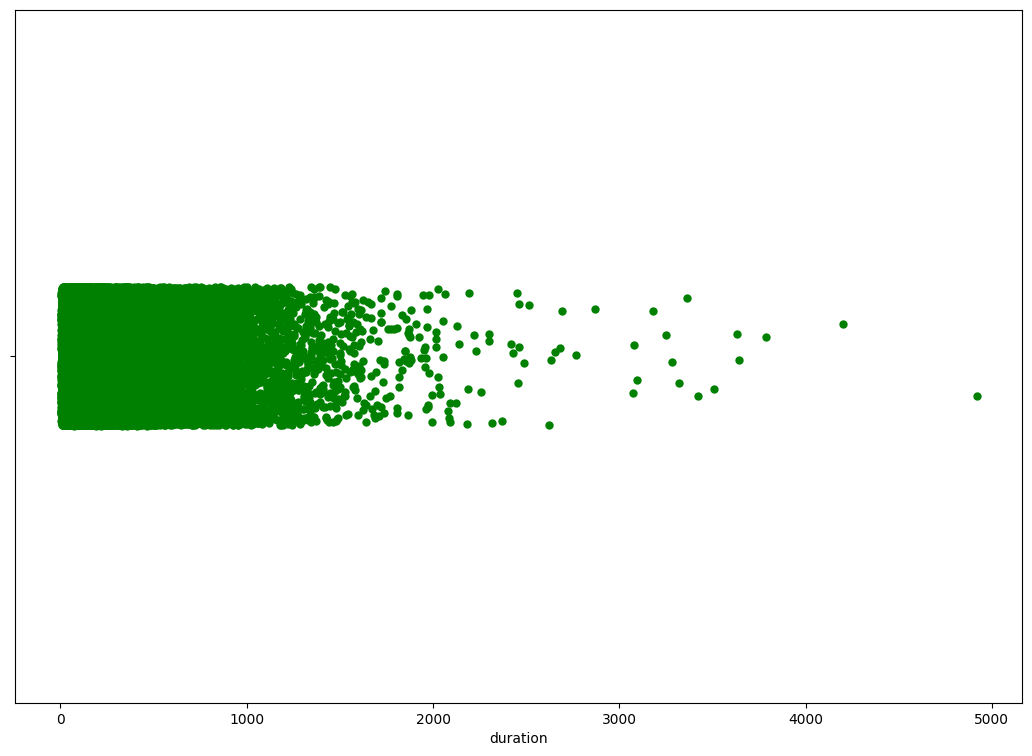

In [42]:
plt.figure(figsize=(13,9))
sns.stripplot(data = df, 
              x = 'duration', 
              color = 'green', 
              jitter = True, 
              size = 6);

In [43]:
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

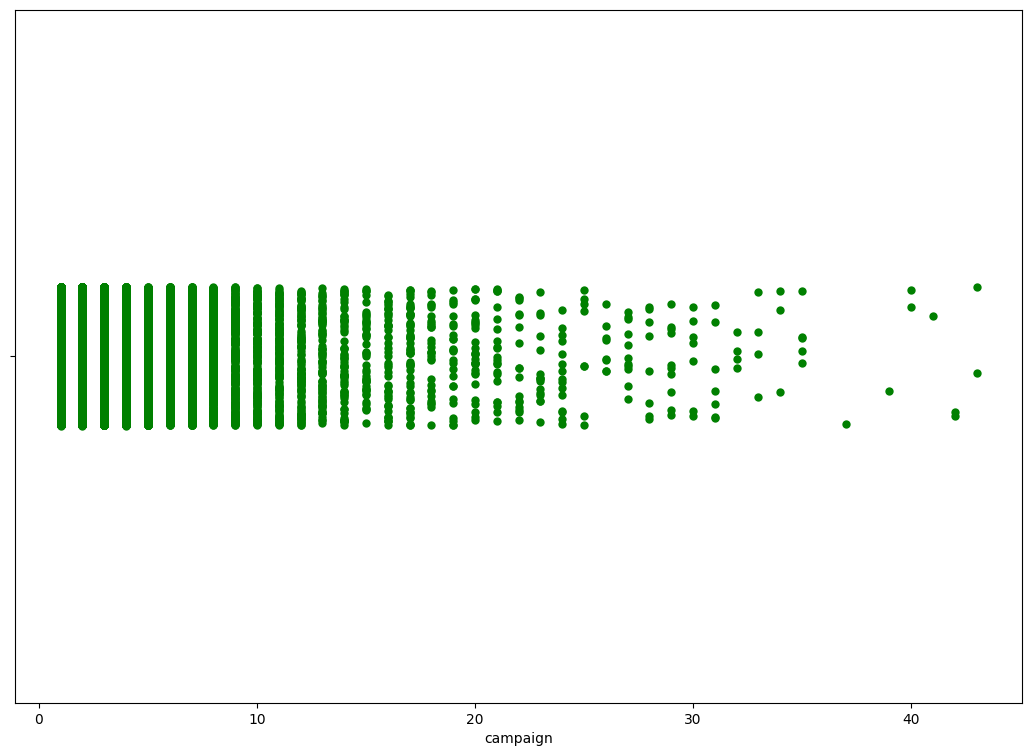

In [44]:
plt.figure(figsize=(13,9))
sns.stripplot(data = df, 
              x = 'campaign', 
              color = 'green', 
              jitter = True, 
              size = 6);

<Axes: ylabel='age'>

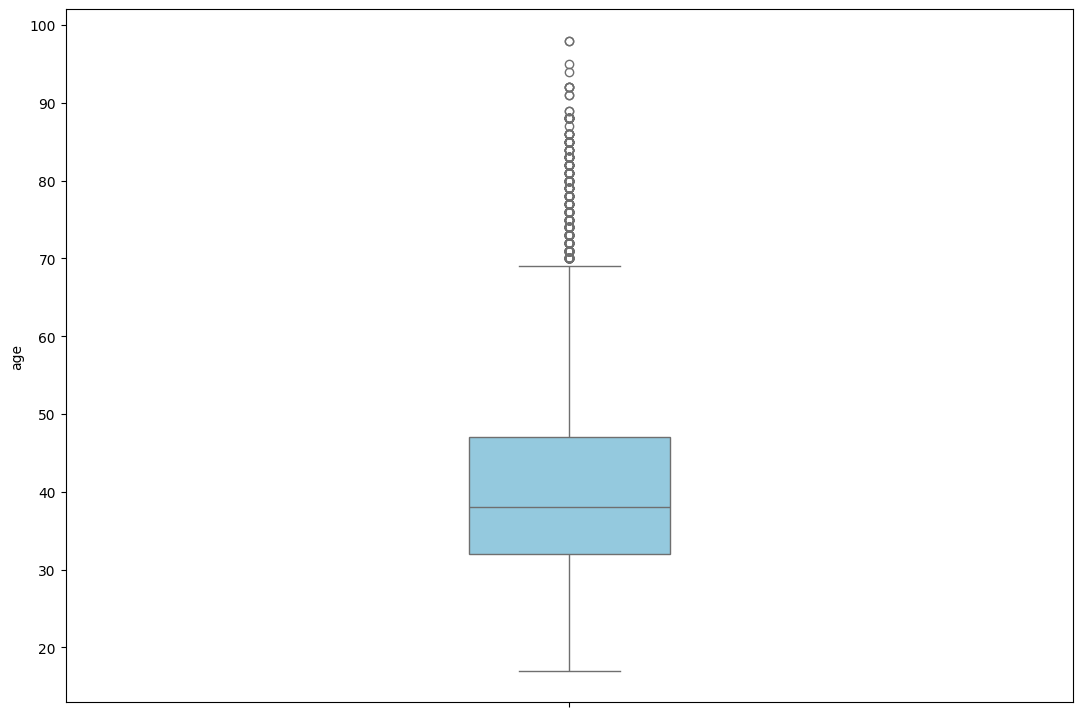

In [45]:
plt.figure(figsize=(13,9))
sns.boxplot(data = df,
            y = 'age',
            color = 'skyblue',
            width = 0.2,
            linewidth = 1)

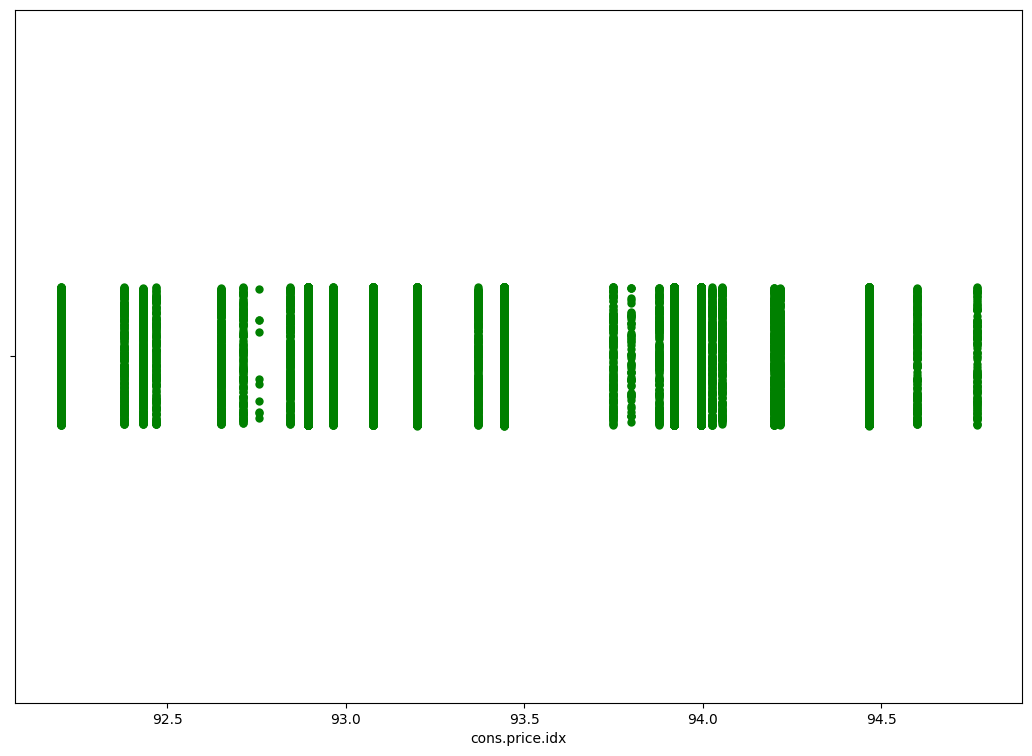

In [46]:
plt.figure(figsize=(13,9))
sns.stripplot(data = df, 
              x = 'cons.price.idx', 
              color = 'green', 
              jitter = True, 
              size = 6);

#### Heandle outliers

+ 'age' - outliers are real - OK
+ 'duration' - outliers mostly are not unreal, but maybe it is better to replace them with quantiles
+ 'campaign' - outliers are OK, but maybe it is better to replace them with quantiles
+ 'pdays' - we'll see what to do with this column leter - is this column informative due to the fact that the majority of records have '999' in the column
+ 'previous' - we'll see what to do with this column leter - is this column informative due to the fact that the majority of records have '0' in the column

Is it better to use StandatdScaler then MinMaxScaler(or even RobustScaler) in Feature Engineering?

In [47]:
# Define a function to find and handle outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Calculate percentage of outliers
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    # Option 2: Cap and floor values
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return outlier_percentage

7.155603589112021

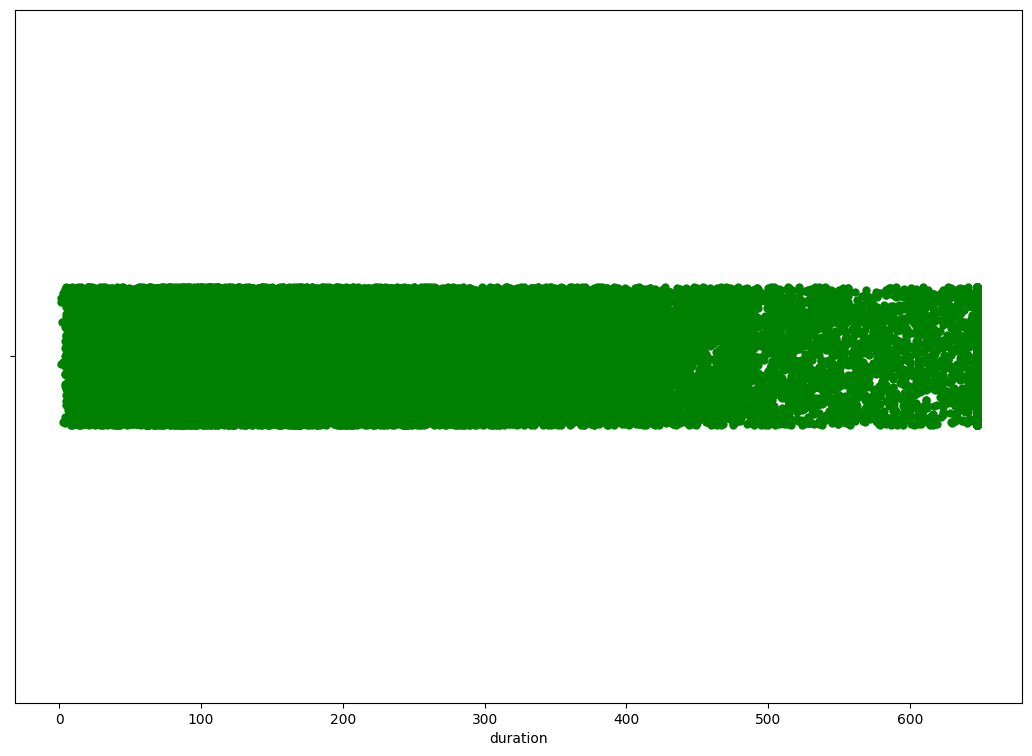

In [48]:
out_percent = handle_outliers(df, 'duration')
plt.figure(figsize=(13,9))
sns.stripplot(data = df, 
              x = 'duration', 
              color = 'green', 
              jitter = True, 
              size = 6);
out_percent

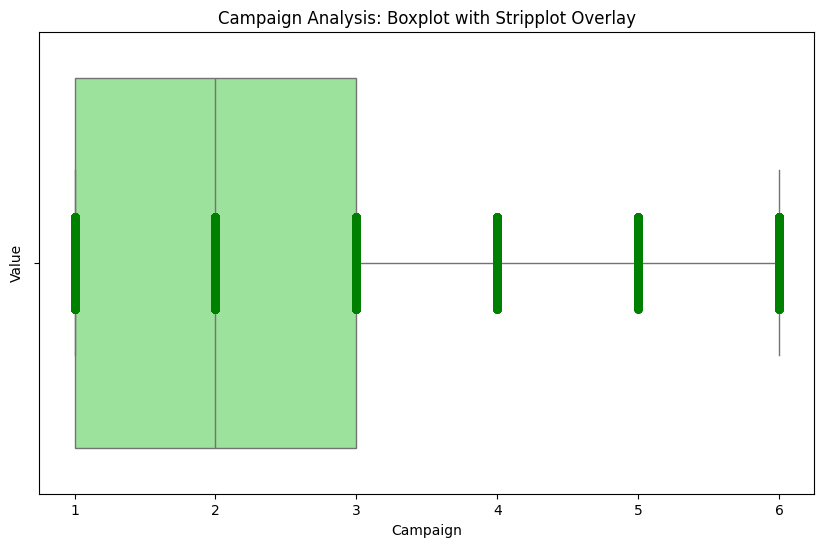

In [49]:
out_percent = handle_outliers(df, 'campaign')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='campaign', color='lightgreen')
sns.stripplot(data=df, 
              x='campaign', 
              color = 'green', 
              jitter = True, 
              size = 6)

plt.title('Campaign Analysis: Boxplot with Stripplot Overlay')
plt.xlabel('Campaign')
plt.ylabel('Value')
plt.show()

In [50]:
out_percent

5.805916505391208

##### Analizing distributions on categorical variables

In [51]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'pdays_binned'],
      dtype='object')

In [52]:
for col in cat_cols:
    print(col, ' -- ', len(df[col].unique()))

job  --  11
marital  --  3
education  --  8
default  --  3
housing  --  2
loan  --  2
contact  --  2
month  --  10
day_of_week  --  5
poutcome  --  3
y  --  2
pdays_binned  --  4


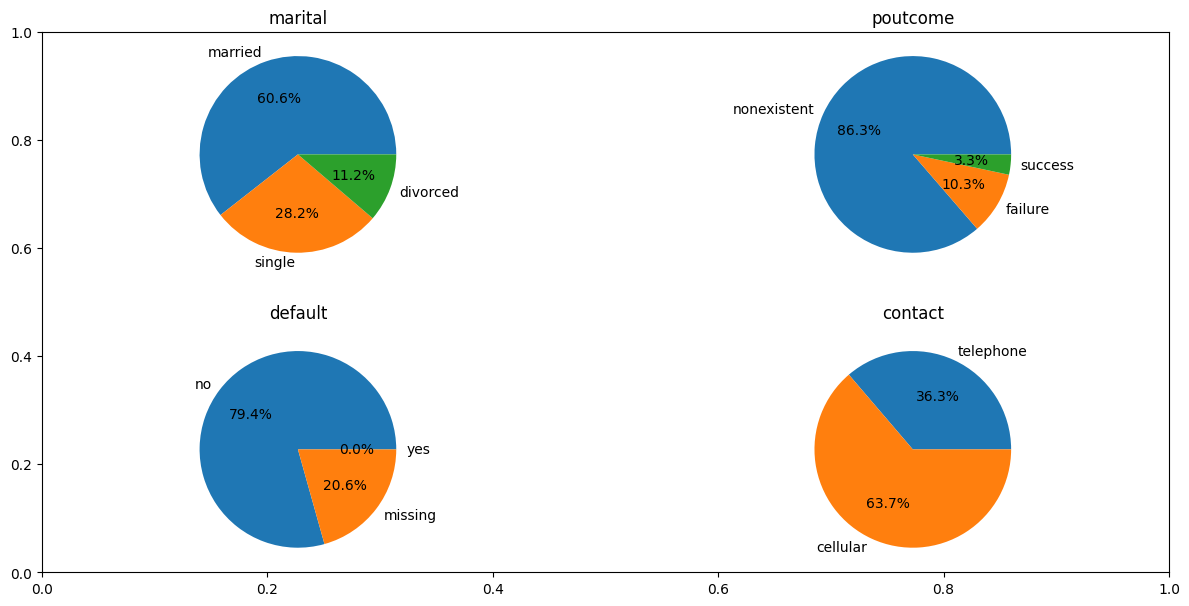

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
plt.tight_layout()
plt.subplot(2,2,1)
plt.pie(df["marital"].value_counts(sort=False), labels=df["marital"].unique(), autopct='%.1f%%')
plt.title('marital')
plt.subplot(2,2,2)
plt.pie(df["poutcome"].value_counts(sort=False), labels=df["poutcome"].unique(), autopct='%.1f%%')
plt.title('poutcome')
plt.subplot(2,2,3)
plt.pie(df["default"].value_counts(sort=False), labels=df["default"].unique(), autopct='%.1f%%')
plt.title('default')
plt.subplot(2,2,4)
plt.pie(df["contact"].value_counts(sort=False), labels=df["contact"].unique(), autopct='%.1f%%')
plt.title('contact')
plt.show()

<Axes: xlabel='education', ylabel='count'>

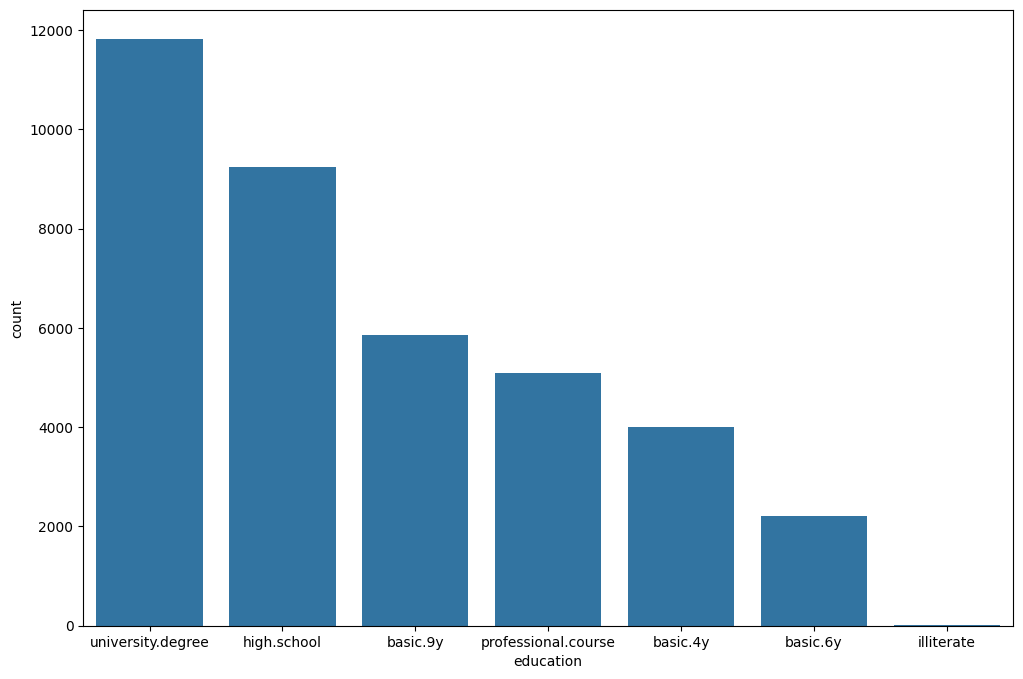

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
order = df['education'].value_counts().index
sns.countplot(df, x="education", order=order)

<Axes: xlabel='default', ylabel='count'>

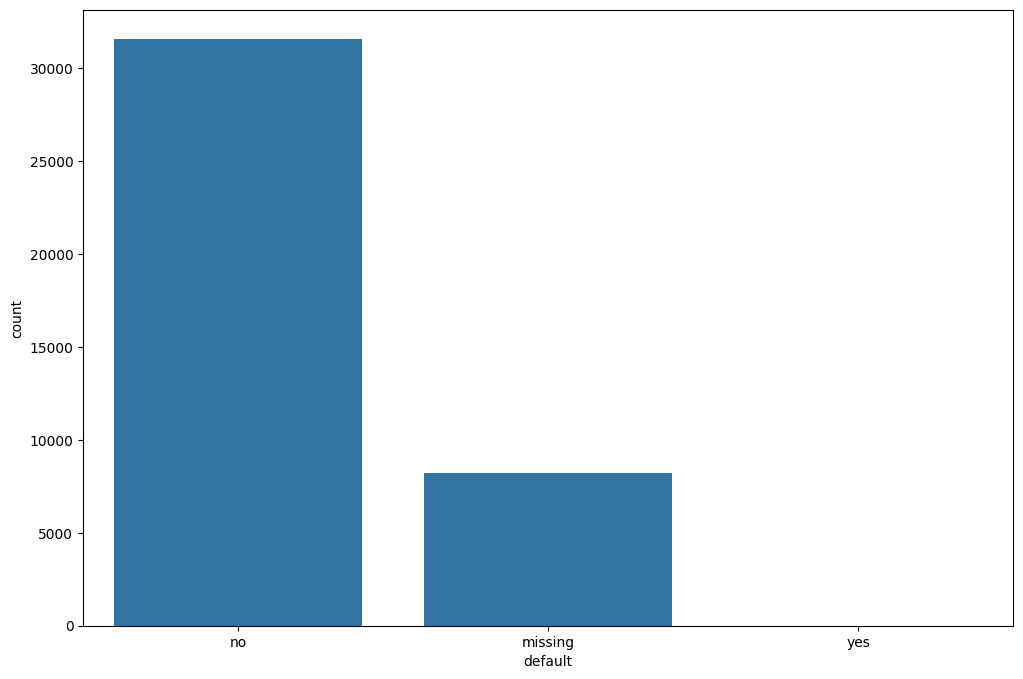

In [55]:
fig, ax = plt.subplots(figsize=(12,8))
order = df['default'].value_counts().index
sns.countplot(df, x="default", order=order)

<Axes: xlabel='job', ylabel='count'>

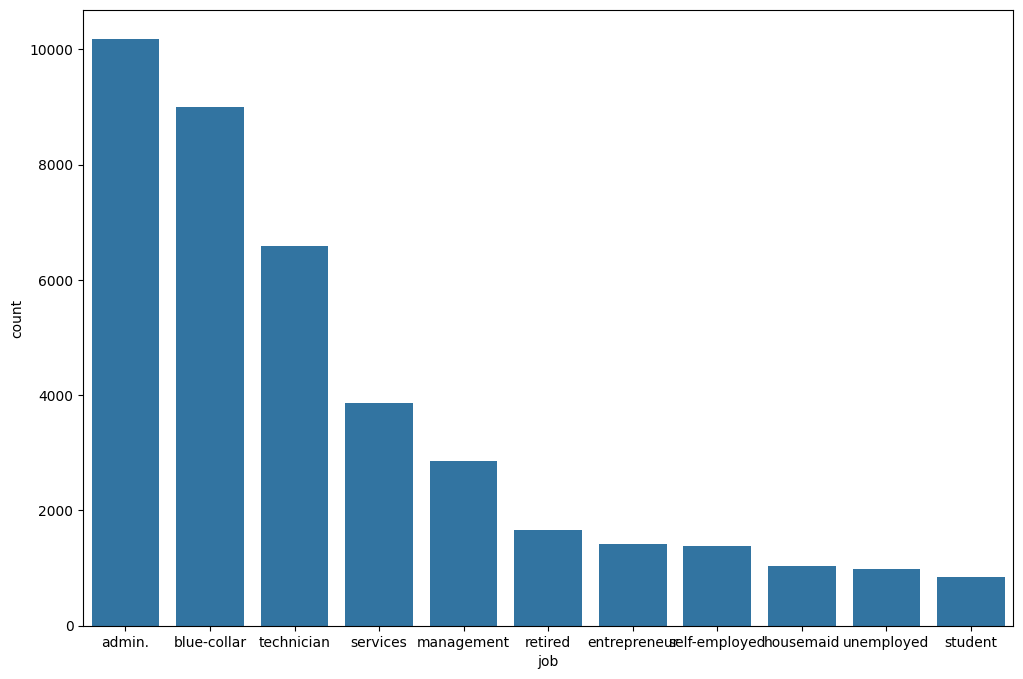

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
order = df['job'].value_counts().index
sns.countplot(df, x="job", order=order)

<Axes: xlabel='month', ylabel='count'>

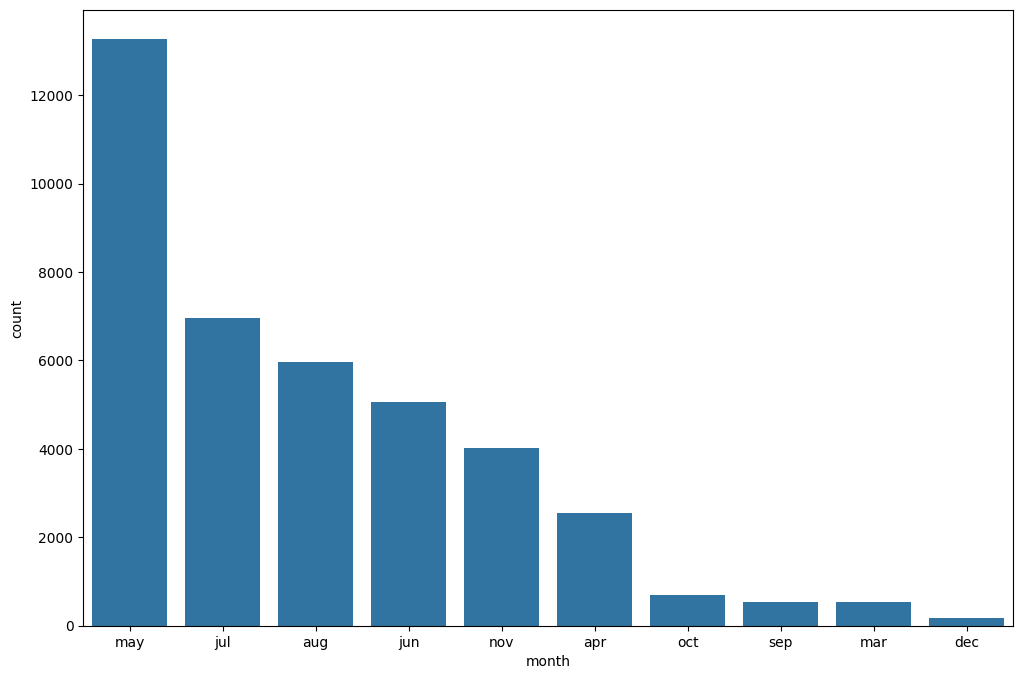

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
order = df['month'].value_counts().index
sns.countplot(df, x="month", order=order)

<Axes: xlabel='campaign', ylabel='count'>

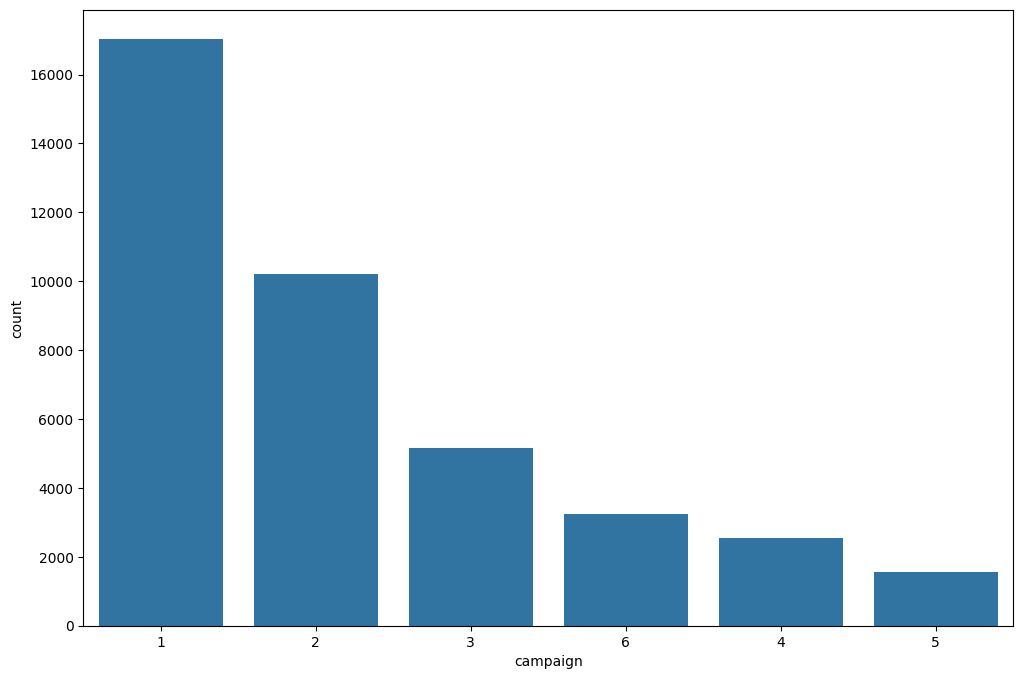

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
order = df['campaign'].value_counts().index
sns.countplot(df, x="campaign", order=order)

#### 4.2 Bivariate Analysis  

Now we want to check the relationships between pais of variables. We can start by drawing a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and a correlation plot.

<Figure size 1000x1000 with 0 Axes>

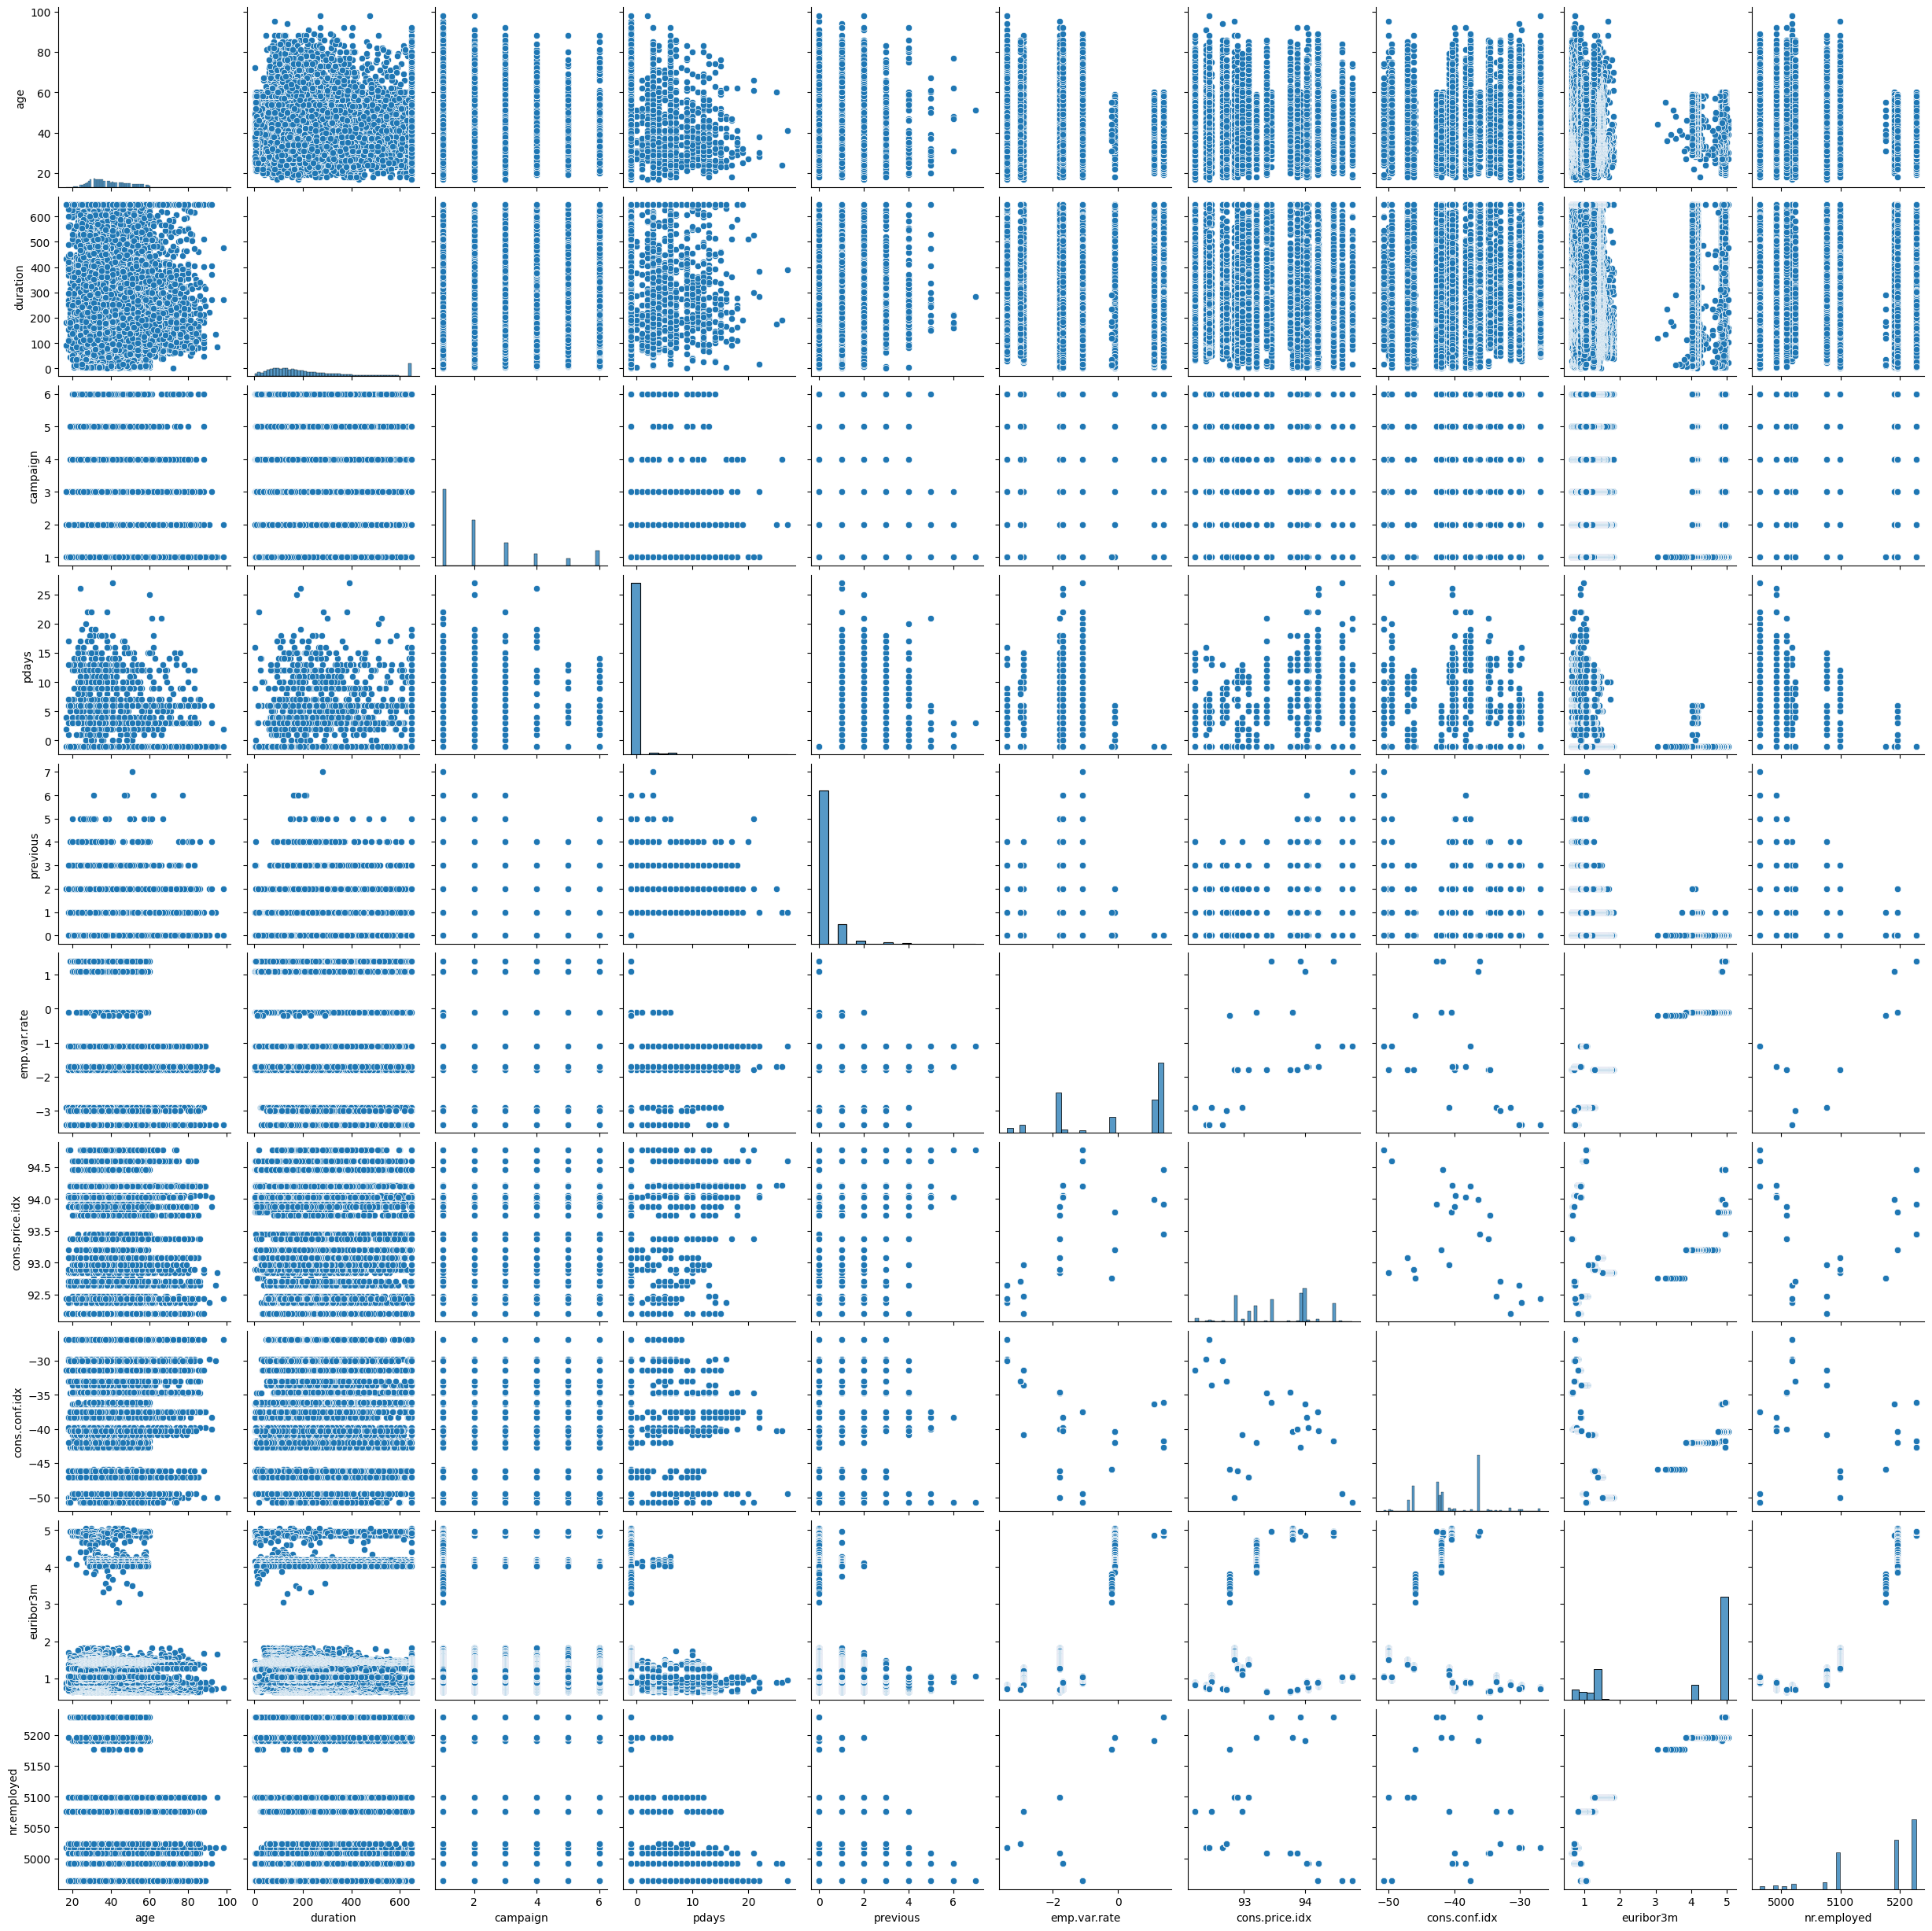

In [59]:
plt.figure(figsize=(10,10))
sns.pairplot(df.select_dtypes(include='number'))

The pairplot can help us gaining quick insights on the correlations of variables, but can get cluttered if we have many features.  
We can also try the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlations:

<Axes: >

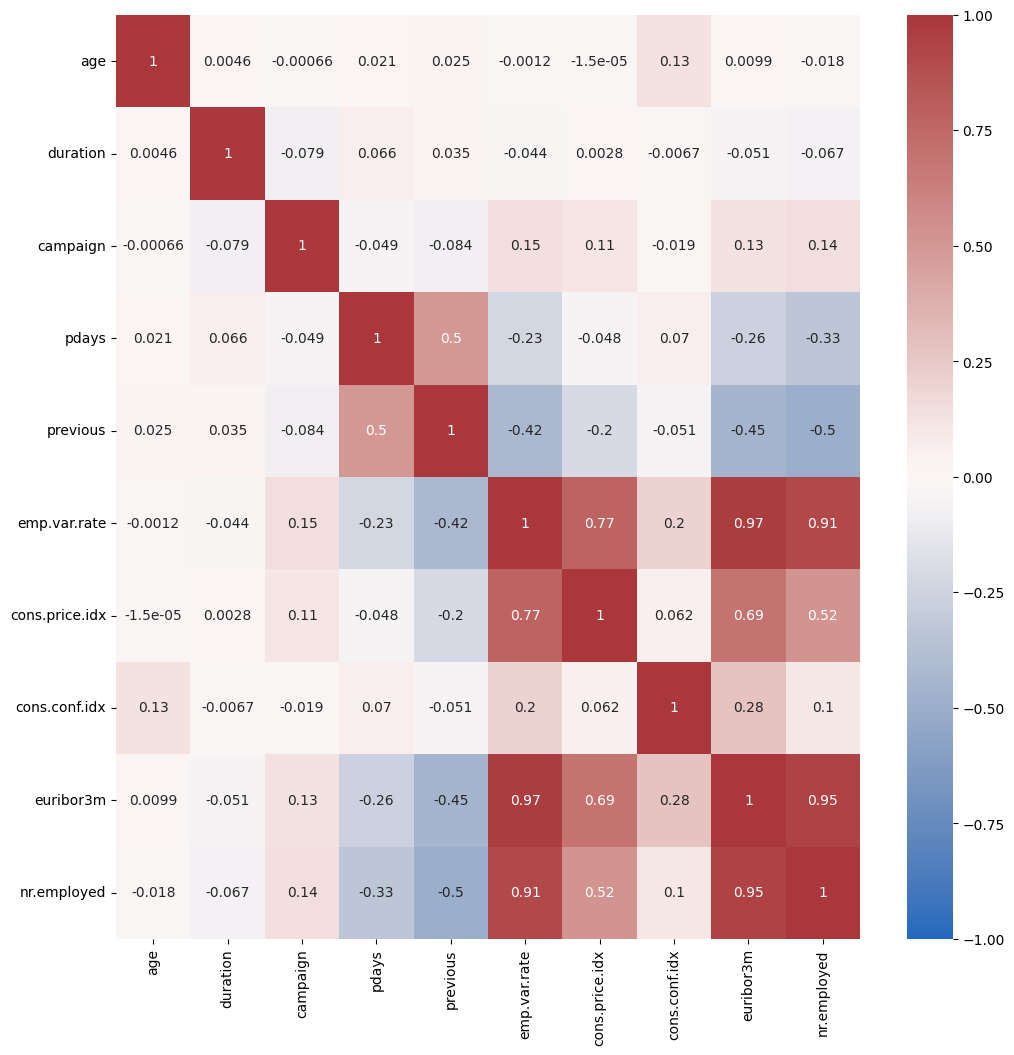

In [60]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,12))
sns.heatmap(numeric_df.corr(), cbar=True, annot=True, cmap='vlag', vmin = -1, vmax = 1)

##### Positive Correlation  
+ 'nr.employed' – 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'cons.conf.idx'(correlated with all Social and economic context attributes)  
+ 'euribor3m' – 'emp.var.rate', 'cons.price.idx', 'nr.employed', 'cons.conf.idx'(correlated with all Social and economic context attributes)  
+ 'cons.conf.idx' – 'emp.var.rate', 'euribor3m', 'nr.employed'(weakly correlated)  
+ 'cons.price.idx' – 'emp.var.rate', 'euribor3m', 'nr.employed'
+ 'emp.var.rate' – 'cons.price.idx', 'euribor3m', 'nr.employed'
+ 'previous' - 'pdays'
+ 'pdays' - 'previous'
+ 'campaign' - 'emp.var.rate', 'cons.price.idx', 'nr.employed', 'euribor3m'(weakly correlated just with some Social and economic context attributes)

###### CONCLUSIONS: 
All social and economic context attributes positively correlate dispite 'cons.conf.idx' which is weakly correlated with 'nr.employed', 'euribor3m'. Idea: in features selection may just one of the correlated attributes needed? Is 'cons.conf.idx' needed in modelling (to check in numeric-categorical visualisation part)


##### Negative Correlation  
+ 'nr.employed' – 'pdays', 'previous'  
+ 'euribor3m' – 'pdays', 'previous'  
+ 'cons.price.idx' – 'previous'
+ 'emp.var.rate' - 'pdays', 'previous'
+ 'previous' - 'nr.employed', 'euribor3m', 'cons.price.idx', 'emp.var.rate'
+ 'pdays' - 'nr.employed', 'euribor3m', 'emp.var.rate'
  
###### CONCLUSIONS: 
Columns 'pdays', 'previous' negatively correlate with such social and economic context attributes as 'nr.employed', 'euribor3m', 'cons.price.idx', 'emp.var.rate'

##### 4.2.1 - Checking some columns in more detail  

<Axes: xlabel='cons.conf.idx', ylabel='y'>

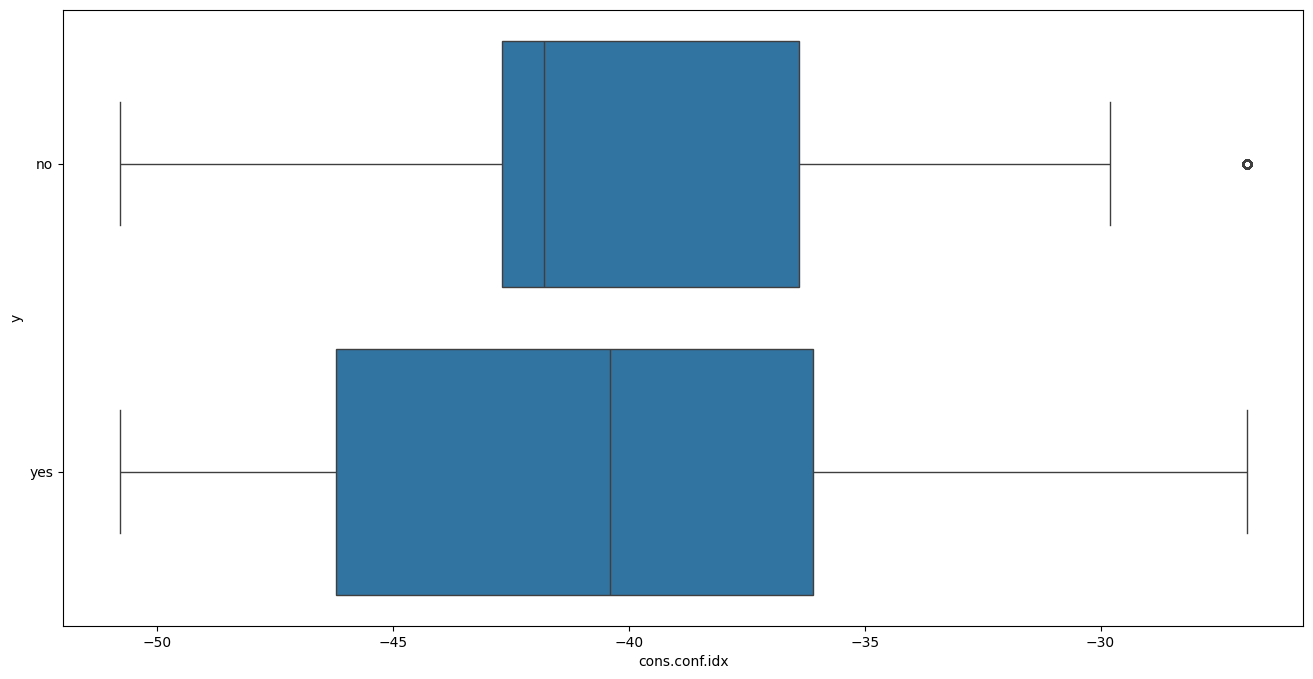

In [61]:
# checking if cons.conf.idx effects our target 'y'
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="cons.conf.idx", y="y", data=df, ax=ax)

Looks like 'y' does not depened on 'cons.conf.idx' - column is not needed in modelling

In [62]:
#other categirical columns visualisation
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df

job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  missing      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome    y     pdays_binned  
0      telephone   may         mon  nonexistent   no  Never contacted  
1      telephone   may         mon  nonexistent   no  Never contacted  
2      telephone   may         mon  nonexistent   no  Never contacted  
3      telephone   may         mon  nonexistent   no  Never contacted  
4      telephone   may         mon  nonexistent   no  Never contacted  
...          ...   ...         ...          ...  ...              ...  
41183   cellular   nov         fri  nonexistent  yes  Never contacted  
41184   cellular   nov         fri  nonexistent   no  Never contacted  
41185   cellular   nov         fri  nonexistent   no  Never contacted  
41186   cellular   nov         fri  nonexistent  yes  Never contacted  
41187   cellular   nov         fri      failure   no  Never contacted  

[39787 rows x 12 columns]

C:\Users\vbr6930\AppData\Local\Temp\ipykernel_30280\455086375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,


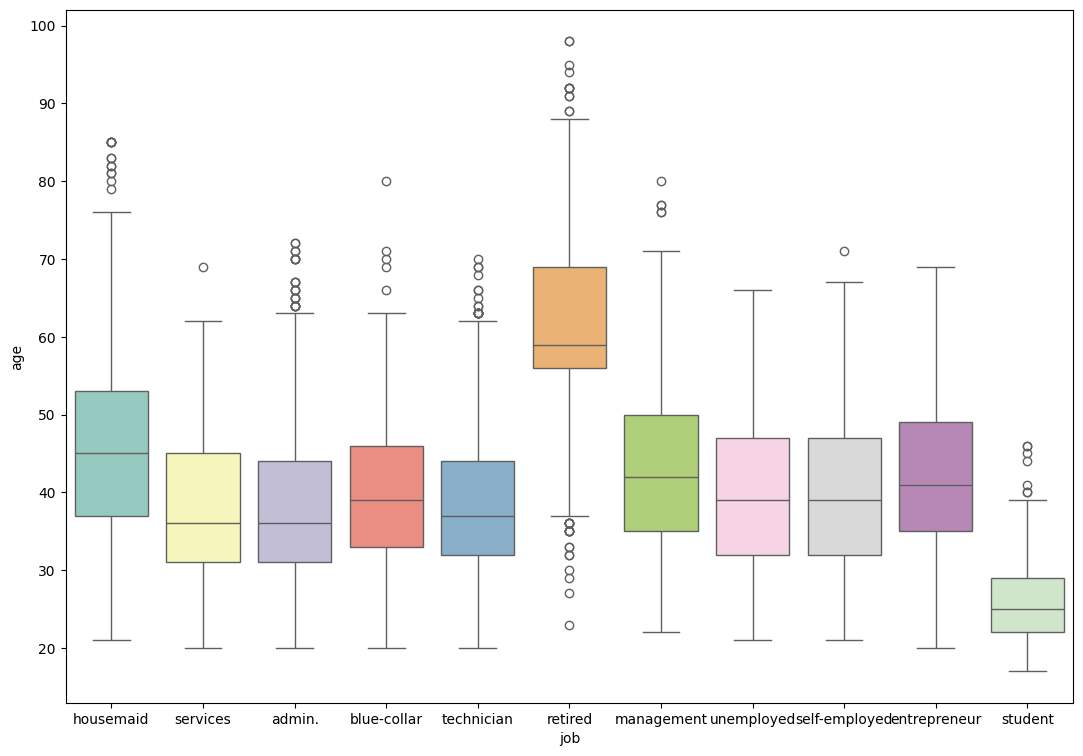

In [63]:
plt.figure(figsize = (13,9))
sns.boxplot(data = df, 
            x = 'job', 
            y = 'age',
            palette = 'Set3');

As logicaly expected, student and retired people are shifting toward younger and older ages, respectively

C:\Users\vbr6930\AppData\Local\Temp\ipykernel_30280\2948924867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,


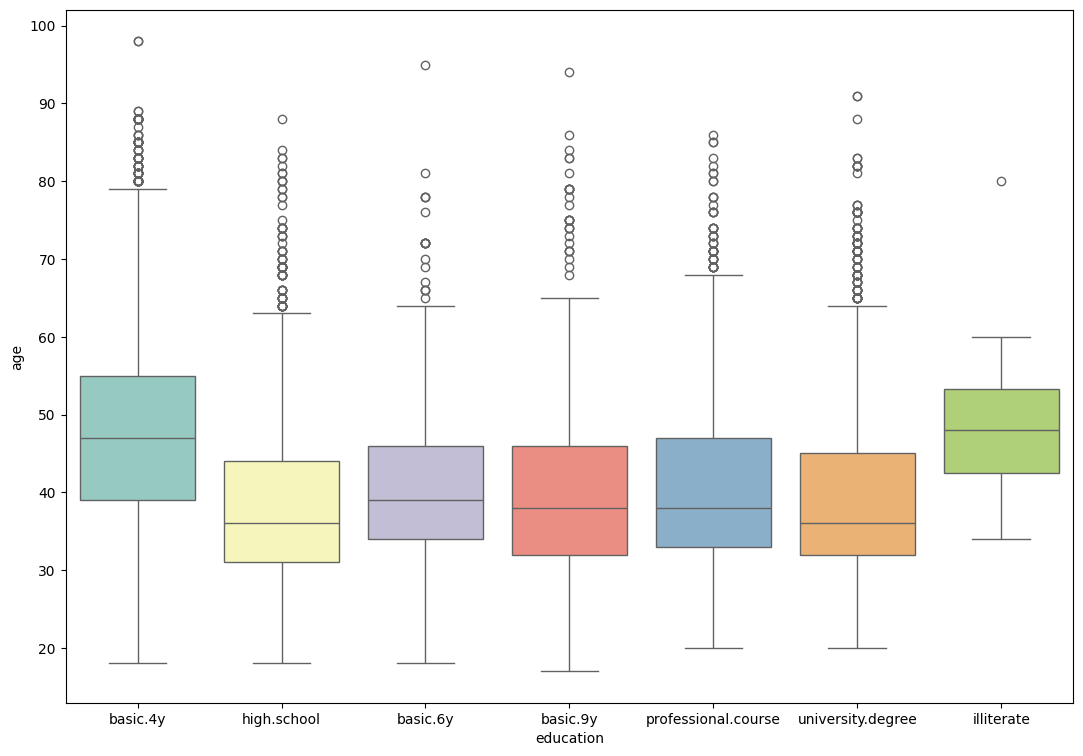

In [64]:
plt.figure(figsize = (13,9))
sns.boxplot(data = df, 
            x = 'education', 
            y = 'age',
            palette = 'Set3');

basic.4y education category is just for people at about 40 and older

In [65]:
#checking if there is dependency between education and credit in default
df.groupby('default')['education'].value_counts()

default  education          
missing  basic.4y                1622
         basic.9y                1580
         high.school             1544
         university.degree       1409
         basic.6y                 815
         professional.course      779
         illiterate                 7
no       university.degree      10407
         high.school             7694
         professional.course     4316
         basic.9y                4275
         basic.4y                2380
         basic.6y                1388
         illiterate                11
yes      professional.course        2
         high.school                1
Name: count, dtype: int64

In [66]:
# Calculate the total counts for each education level across all 'default' values
total_education_counts = df['education'].value_counts()

# Get counts for each combination of 'default' and 'education'
grouped_counts = df.groupby(['default', 'education']).size()

# Calculate the percentage
grouped_percentage = grouped_counts.div(total_education_counts, level='education') * 100

# Combine counts and percentages into a single DataFrame
result = pd.concat([grouped_counts.rename('count'), grouped_percentage.rename('percentage')], axis=1)

print(result)

                             count  percentage
default education                             
missing basic.4y              1622   40.529735
        basic.6y               815   36.995007
        basic.9y              1580   26.985482
        high.school           1544   16.711765
        illiterate               7   38.888889
        professional.course    779   15.283500
        university.degree     1409   11.924509
no      basic.4y              2380   59.470265
        basic.6y              1388   63.004993
        basic.9y              4275   73.014518
        high.school           7694   83.277411
        illiterate              11   61.111111
        professional.course   4316   84.677261
        university.degree    10407   88.075491
yes     high.school              1    0.010824
        professional.course      2    0.039239


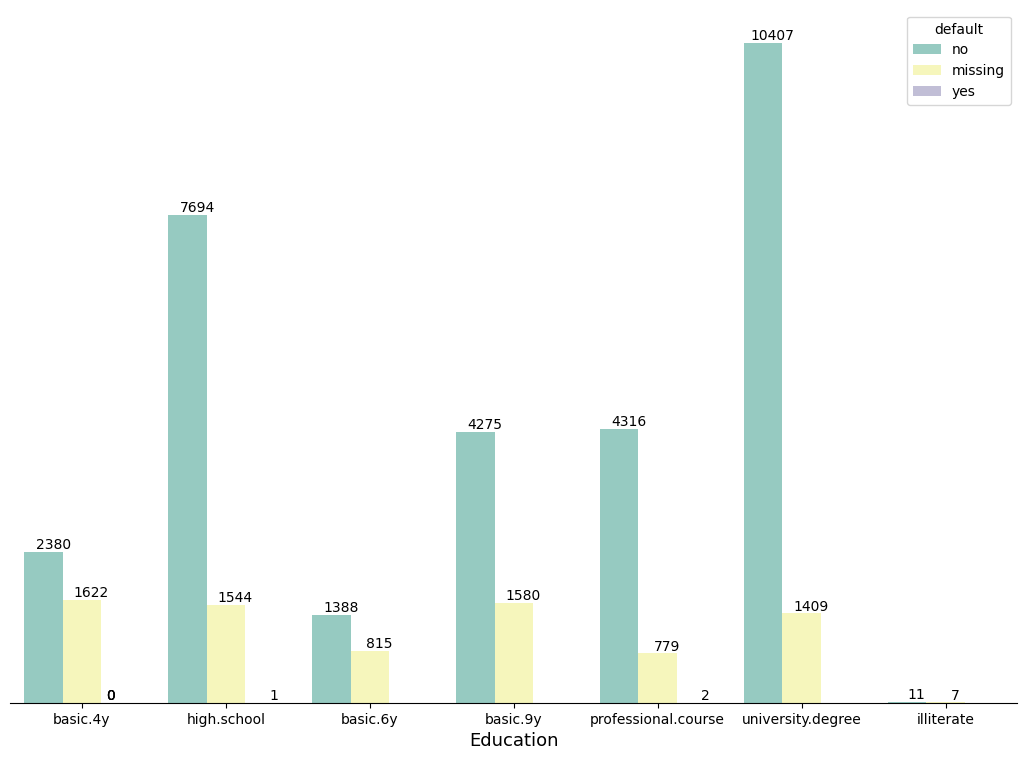

In [67]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'education', hue = 'default', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',          
                  # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = '', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('Education', fontsize = 13);      

The most intresting  category is basic.4y where for 40% of all individuals column 'default' are filled in with 'yes'. And now I'm wondering does it look like a real situation, because, on the other hand they may not be able to have credit at all. On the other hand, all the categories from Education are not presented in data same with equal % of records.

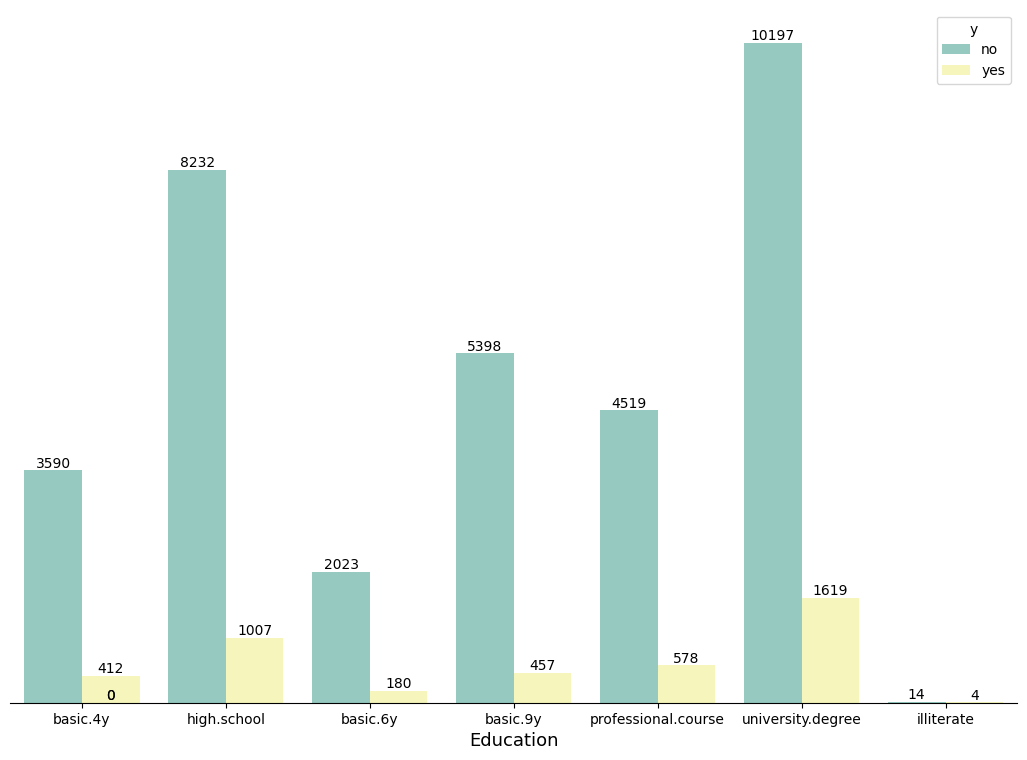

In [68]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'education', hue = 'y', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = '', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('Education', fontsize = 13); 

In [69]:
# Calculate the total counts for each education level across all 'default' values
total_education_counts = df['education'].value_counts()

# Get counts for each combination of 'default' and 'education'
grouped_counts = df.groupby(['y', 'education']).size()

# Calculate the percentage
grouped_percentage = grouped_counts.div(total_education_counts, level='education') * 100

# Combine counts and percentages into a single DataFrame
result = pd.concat([grouped_counts.rename('count'), grouped_percentage.rename('percentage')], axis=1)

print(result)

                         count  percentage
y   education                             
no  basic.4y              3590   89.705147
    basic.6y              2023   91.829324
    basic.9y              5398   92.194705
    high.school           8232   89.100552
    illiterate              14   77.777778
    professional.course   4519   88.659996
    university.degree    10197   86.298240
yes basic.4y               412   10.294853
    basic.6y               180    8.170676
    basic.9y               457    7.805295
    high.school           1007   10.899448
    illiterate               4   22.222222
    professional.course    578   11.340004
    university.degree     1619   13.701760


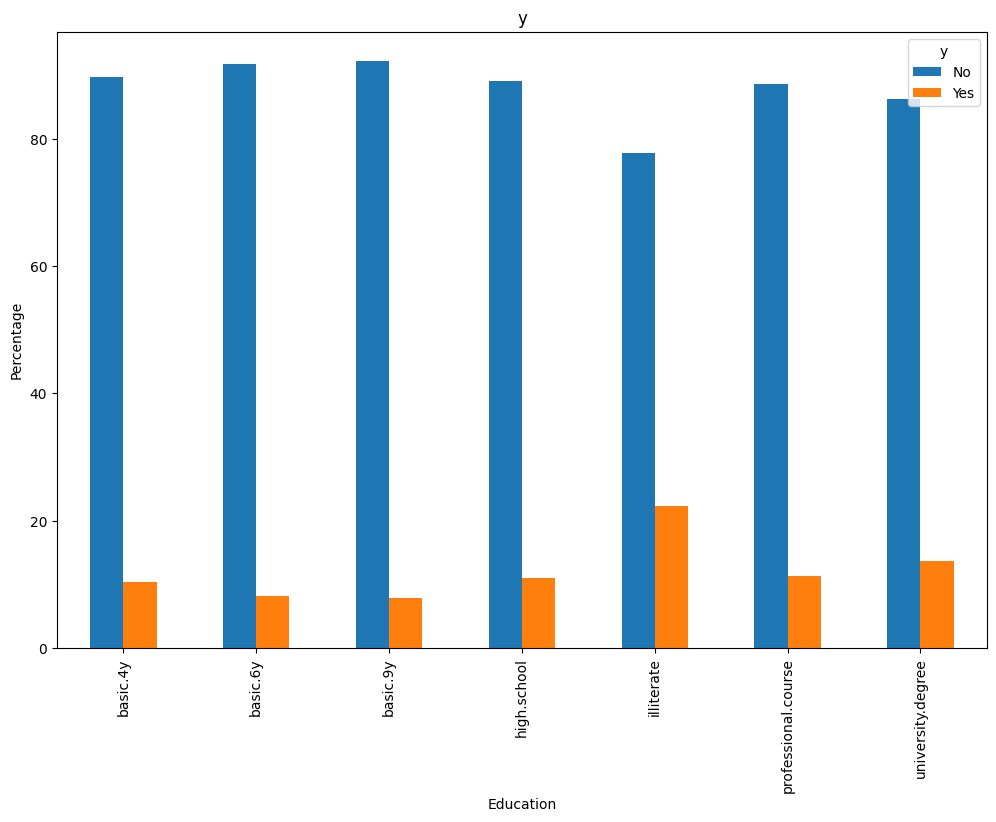

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
unstacked_data = result['percentage'].unstack(level=0)
unstacked_data.plot(kind='bar', ax=ax)


ax.set_title('y')
ax.set_xlabel('Education')
ax.set_ylabel('Percentage')


ax.legend(title='y', labels=['No', 'Yes']) 


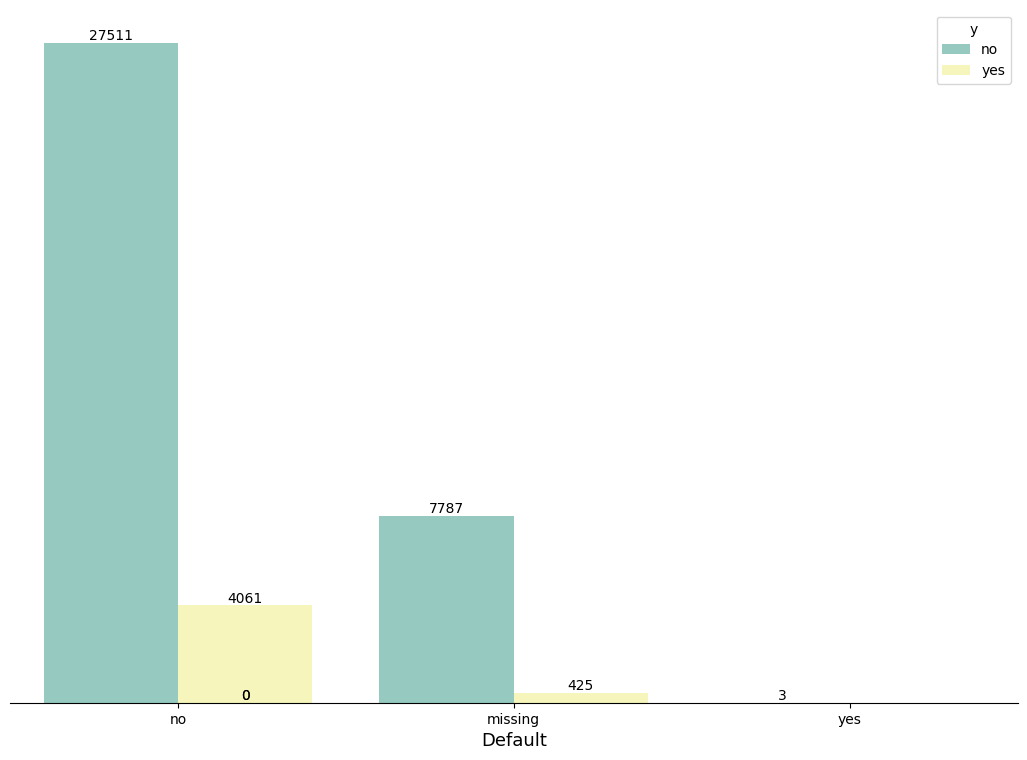

In [71]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'default', hue = 'y', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = '', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('Default', fontsize = 13); 

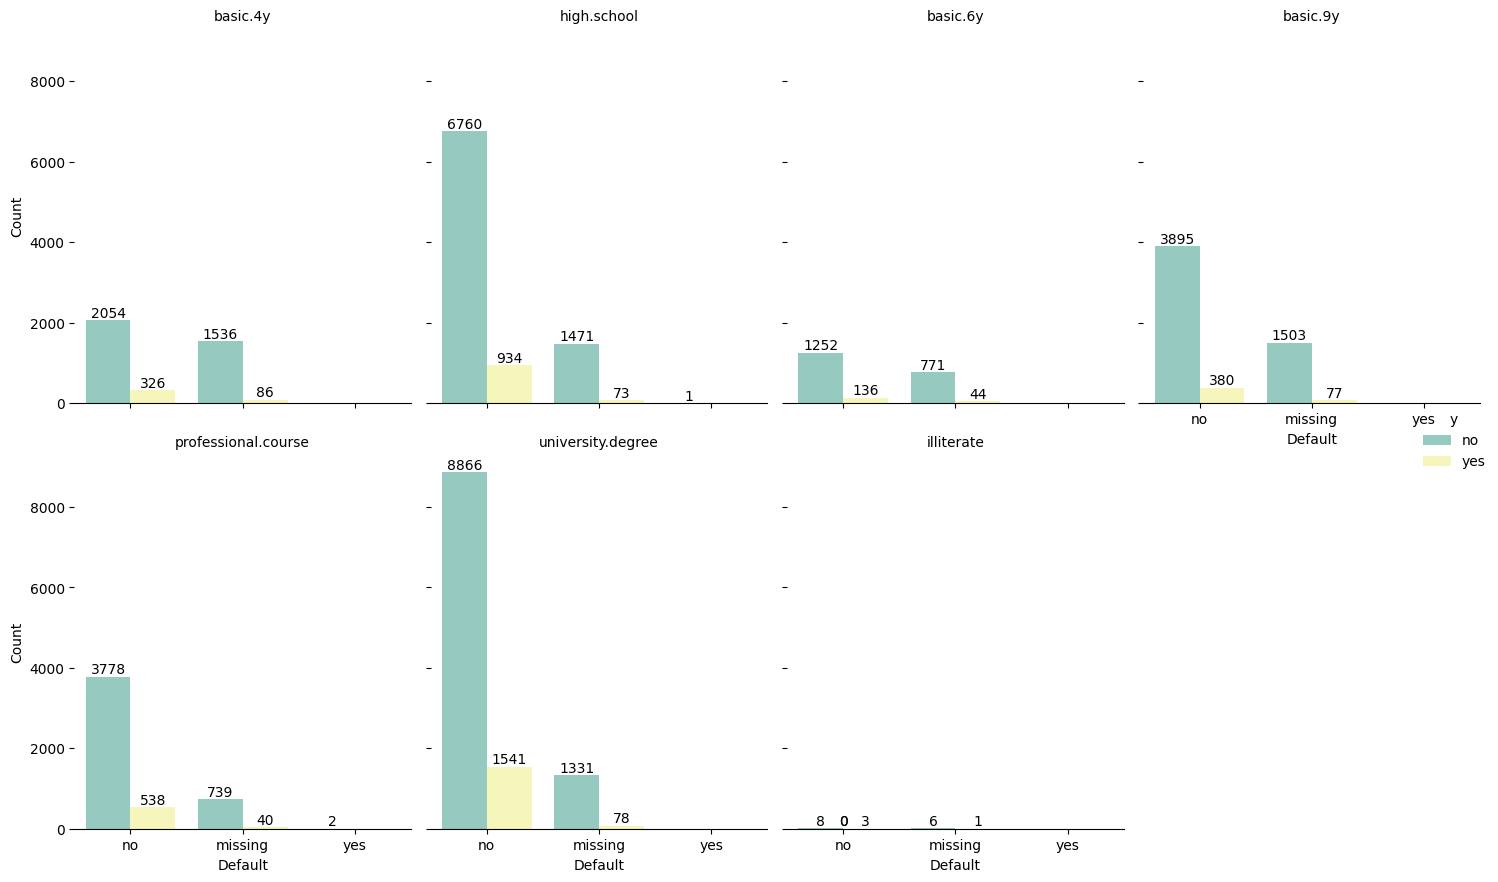

In [72]:
# Creating a FacetGrid using catplot for better handling of multiple categorical variables
g = sns.catplot(data=df, x='default', hue='y', col='education', 
                kind='count', col_wrap=4, height=4, aspect=1, palette='Set3')

# Adjusting each subplot in the FacetGrid
g.fig.set_size_inches(15, 10)  # Adjust the size of the entire grid
for ax in g.axes.flat:
    ax.set_ylabel('Count')
    ax.set_xlabel('Default')
    # Annotate each bar in individual plots
    for patch in ax.patches:
        ax.annotate('{:.0f}'.format(patch.get_height()),
                    (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='bottom', color='black', fontsize=10)

# Using tight_layout to adjust spacing automatically
plt.tight_layout()
# Optionally, adjust subplot parameters manually if necessary
g.fig.subplots_adjust(bottom=0.1, top=0.9)  # adjust the bottom, top, spacing, etc.
sns.despine(top=True, left=True)  # Removing spines from all plots
g.set_titles("{col_name}")  # Set titles to be the value of education
#g.set(yticks=[])  # Remove y-axis ticks from all subplots
plt.show()

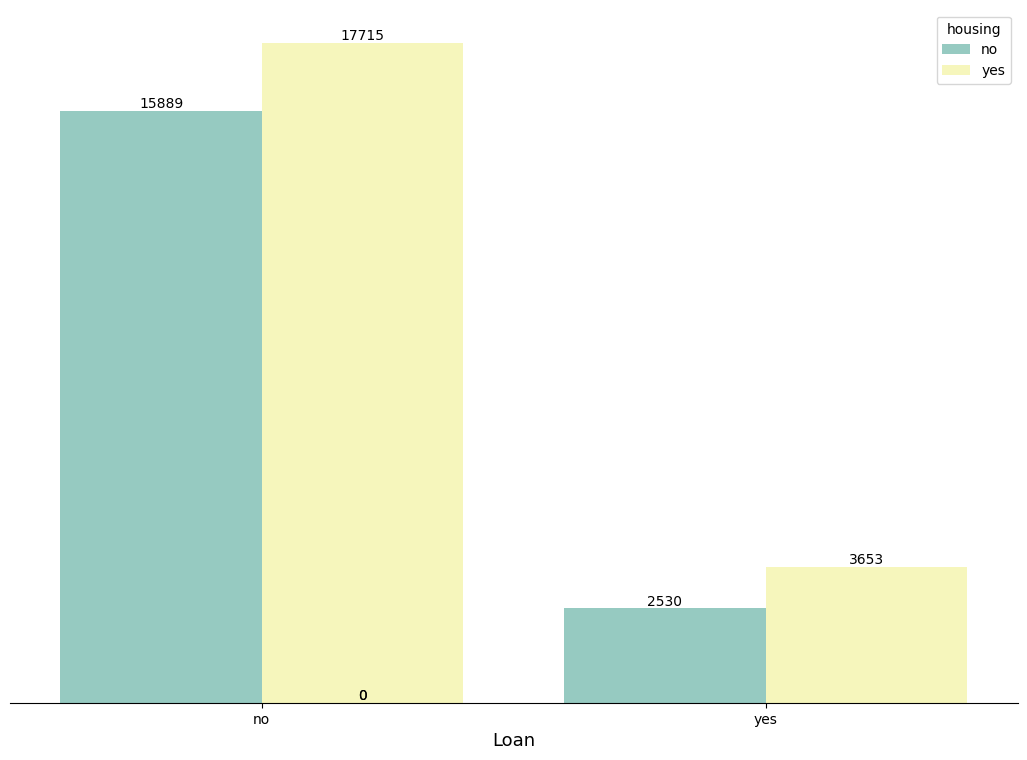

In [73]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'loan', hue = 'housing', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = '', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('Loan', fontsize = 13);  

In [74]:
df_prev_error = df[(df['poutcome'] == 'failure') & (df['pdays'] == -1)] 
df_prev_error

age            job   marital            education default housing loan  \
24013   38    blue-collar    single                  NaN      no     yes   no   
24019   40       services   married          high.school      no     yes   no   
24076   36         admin.   married    university.degree      no     yes   no   
24102   36         admin.   married          high.school      no     yes   no   
24113   29  self-employed   married    university.degree      no     yes   no   
...    ...            ...       ...                  ...     ...     ...  ...   
41166   32         admin.   married    university.degree      no      no   no   
41170   40     management  divorced    university.degree      no     yes   no   
41173   62        retired   married    university.degree      no     yes   no   
41175   34        student    single                  NaN      no     yes   no   
41187   74        retired   married  professional.course      no     yes   no   

         contact month day_of_week  ...  pdays  previous  poutcome  \
24013  telephone   oct         tue  ...     -1         1   failure   
24019  telephone   oct         tue  ...     -1         1   failure   
24076  telephone   nov         wed  ...     -1         1   failure   
24102  telephone   nov         wed  ...     -1         1   failure   
24113  telephone   nov         thu  ...     -1         1   failure   
...          ...   ...         ...  ...    ...       ...       ...   
41166  telephone   nov         wed  ...     -1         1   failure   
41170   cellular   nov         wed  ...     -1         4   failure   
41173   cellular   nov         thu  ...     -1         2   failure   
41175   cellular   nov         thu  ...     -1         2   failure   
41187   cellular   nov         fri  ...     -1         1   failure   

       emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
24013          -0.1         93.798          -40.4      4.968       5195.8   
24019          -0.1         93.798          -40.4      4.968       5195.8   
24076          -0.1         93.200          -42.0      4.663       5195.8   
24102          -0.1         93.200          -42.0      4.286       5195.8   
24113          -0.1         93.200          -42.0      4.245       5195.8   
...             ...            ...            ...        ...          ...   
41166          -1.1         94.767          -50.8      1.030       4963.6   
41170          -1.1         94.767          -50.8      1.030       4963.6   
41173          -1.1         94.767          -50.8      1.031       4963.6   
41175          -1.1         94.767          -50.8      1.031       4963.6   
41187          -1.1         94.767          -50.8      1.028       4963.6   

         y     pdays_binned  
24013   no  Never contacted  
24019  yes  Never contacted  
24076   no  Never contacted  
24102  yes  Never contacted  
24113   no  Never contacted  
...    ...              ...  
41166  yes  Never contacted  
41170   no  Never contacted  
41173  yes  Never contacted  
41175   no  Never contacted  
41187   no  Never contacted  

[3975 rows x 22 columns]

In [75]:
df_prev_error.shape[0]/df.shape[0]

0.099907004800563

What to do with the records where, based on column 'pdays'  client was not contacted before(previous compaign), but at the same time column 'poutcome' says that previous compaign was failed.
10% from total records

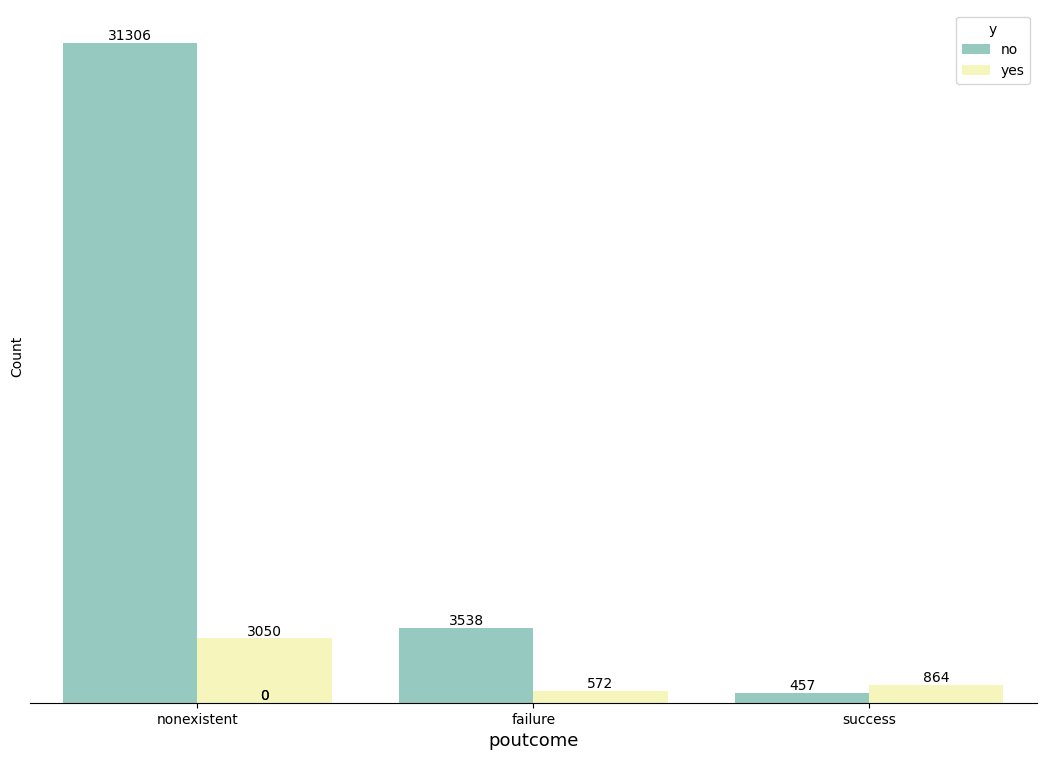

In [76]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'poutcome', hue = 'y', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = 'Count', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('poutcome', fontsize = 13);  

Let's look if there is any dependency between uor target and pdays. If there is no dependency it might be better just to not consider thic column in modelling. 

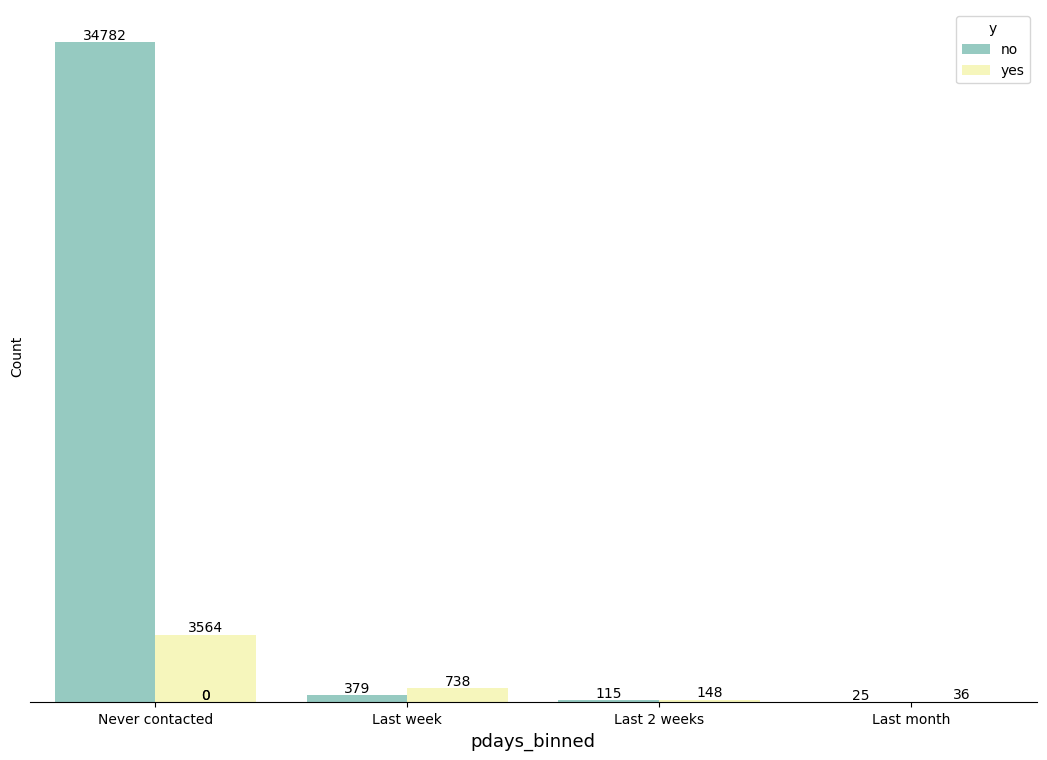

In [77]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'pdays_binned', hue = 'y', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = 'Count', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('pdays_binned', fontsize = 13);  

Taking into account that for almost all recored this column have value "Never contacted" it id better to drop this column and also column pdays which have tha same data but in numerical values.
But before we drop these columns lets also look at column 'previous'. This column might correlate with 'poutcome': what do we have in the 'previous' in case of 'poutcome' = 'failure'?

In [78]:
df_prev = df[(df['pdays'] == -1)]
df_prev.groupby(['previous', 'poutcome'])['pdays'].count()

previous  poutcome   
0         nonexistent    34356
1         failure         3576
2         failure          336
3         failure           49
4         failure           11
5         failure            2
6         failure            1
Name: pdays, dtype: int64

In case of 'poutcome' = 'failure' colimn 'previous' != 0, therefore, logicaly 'pdays' != -1. Decision(also because data in these columns are almost always the same): to drop columns 'pdays', 'pdays_binned' and 'previous'. 

In [79]:
df = df.drop(['pdays', 'pdays_binned', 'previous'], axis=1) #drop columns with the same values in almost all records

In [80]:
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  missing      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign     poutcome  \
0      telephone   may         mon       261         1  nonexistent   
1      telephone   may         mon       149         1  nonexistent   
2      telephone   may         mon       226         1  nonexistent   
3      telephone   may         mon       151         1  nonexistent   
4      telephone   may         mon       307         1  nonexistent   
...          ...   ...         ...       ...       ...          ...   
41183   cellular   nov         fri       334         1  nonexistent   
41184   cellular   nov         fri       383         1  nonexistent   
41185   cellular   nov         fri       189         2  nonexistent   
41186   cellular   nov         fri       442         1  nonexistent   
41187   cellular   nov         fri       239         3      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
41183          -1.1          94.767          -50.8      1.028       4963.6   
41184          -1.1          94.767          -50.8      1.028       4963.6   
41185          -1.1          94.767          -50.8      1.028       4963.6   
41186          -1.1          94.767          -50.8      1.028       4963.6   
41187          -1.1          94.767          -50.8      1.028       4963.6   

         y  
0       no  
1       no  
2       no  
3       no  
4       no  
...    ...  
41183  yes  
41184   no  
41185   no  
41186  yes  
41187   no  

[39787 rows x 19 columns]

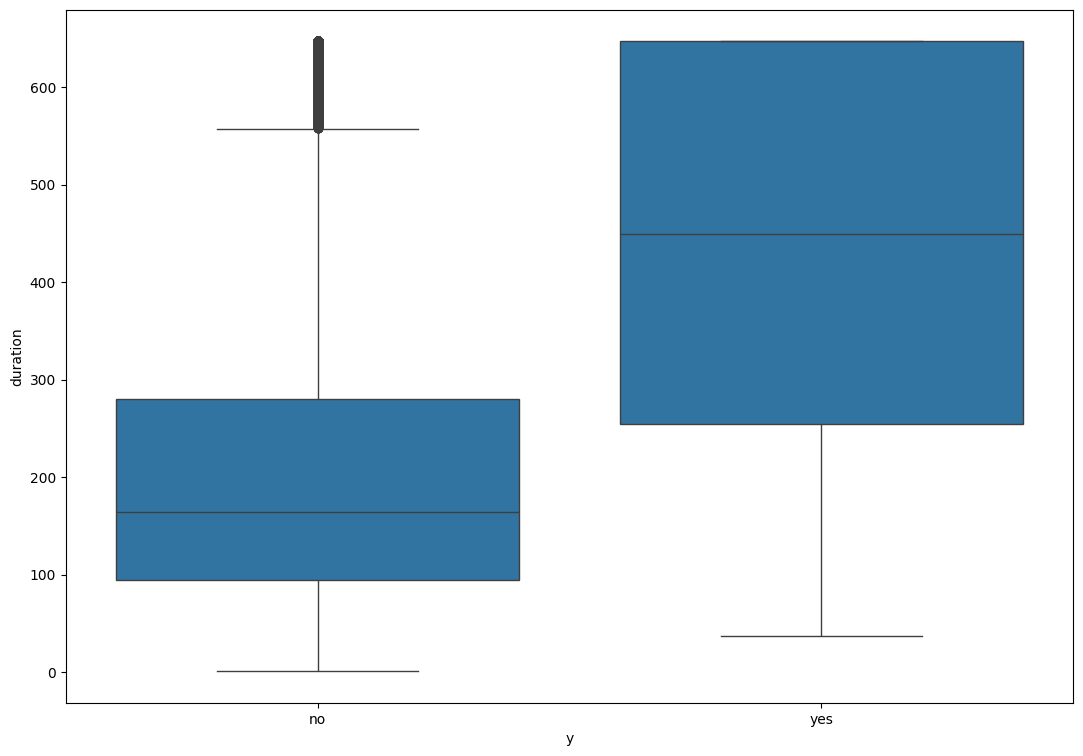

In [81]:
plt.figure(figsize = (13,9))
ax = sns.boxplot(data = df, 
              x = 'y', 
              y = 'duration')

Client with target y = 'yes' have longer conversations. Does duration depends on contact type?

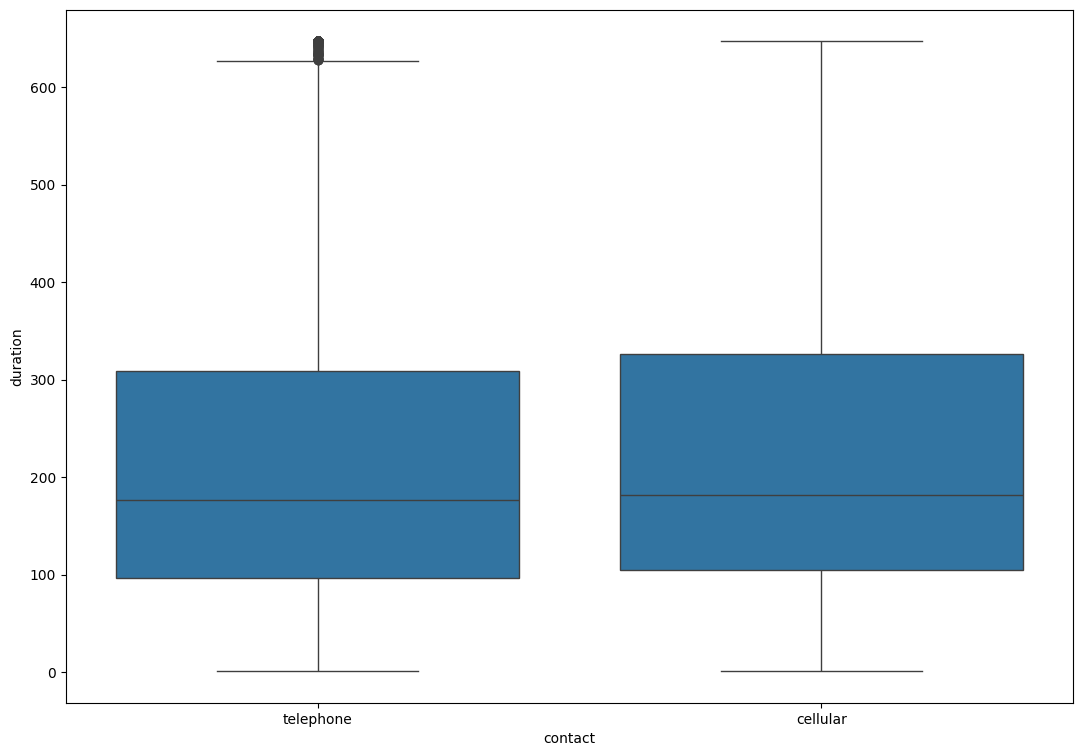

In [82]:
plt.figure(figsize = (13,9))
ax = sns.boxplot(data = df, 
              x = 'contact', 
              y = 'duration')

Correlation is hardly noticeable. Is there correlation between 'contact' and 'y'?

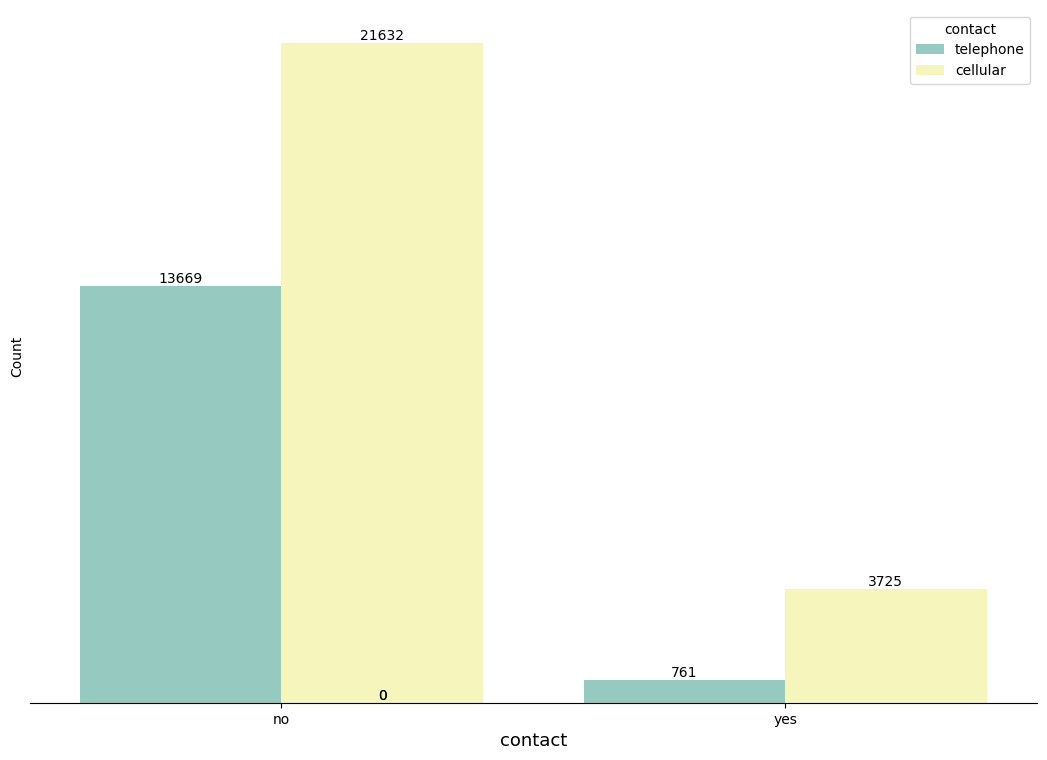

In [83]:
plt.figure(figsize = (13,9))
bars = sns.countplot(data = df, x = 'y', hue = 'contact', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of the bar, adding some float to center it 
                                                    # and getting the height of the bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = 'Count', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('contact', fontsize = 13);  

<Axes: xlabel='job'>

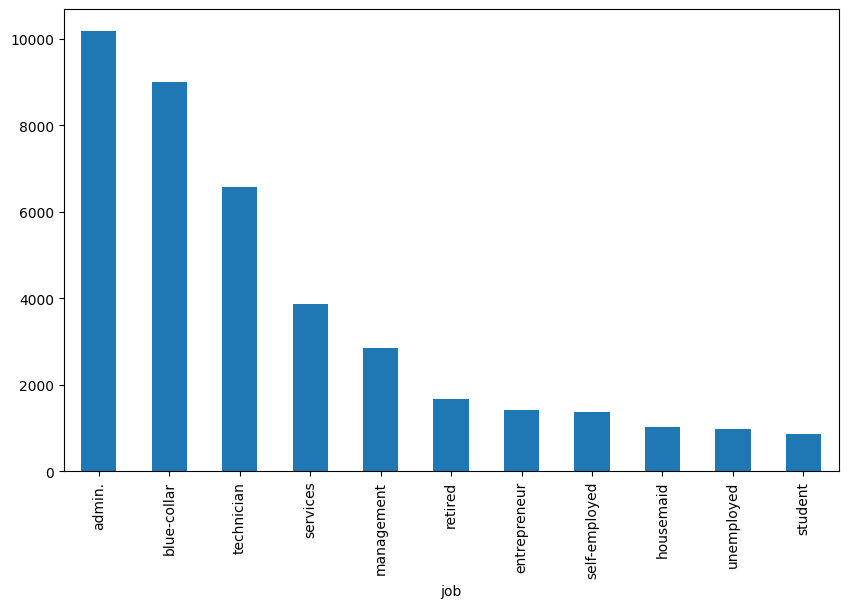

In [84]:
# Unique values in num_of_doors
df["job"].value_counts().plot(kind="bar", figsize=(10,6))

<Axes: xlabel='y', ylabel='job'>

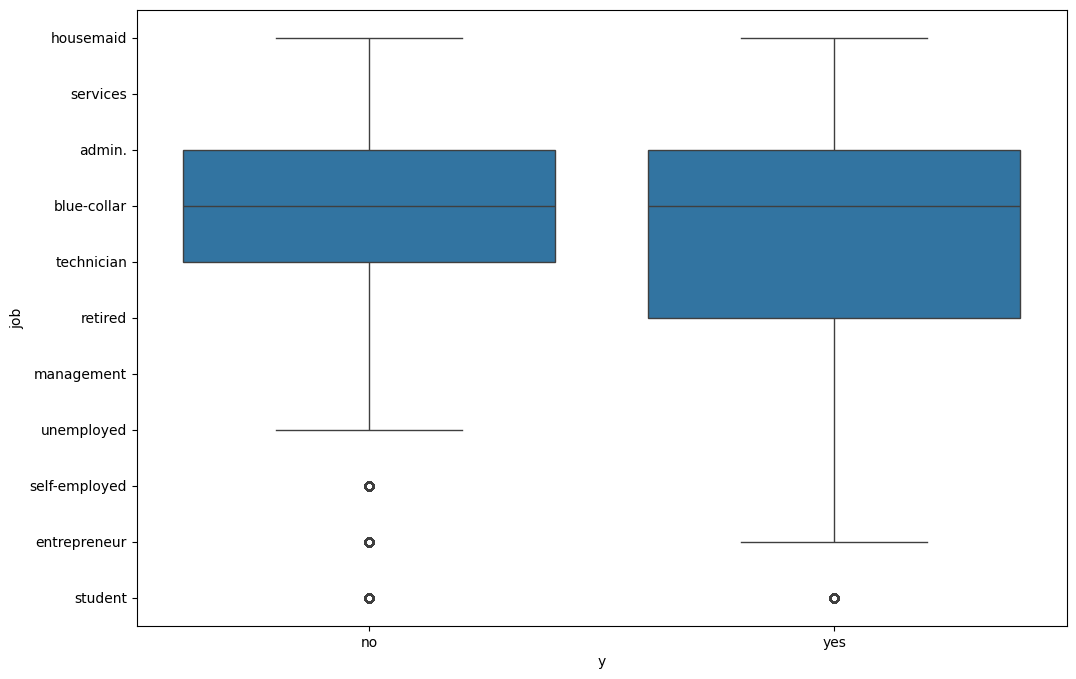

In [85]:
plt.figure(figsize=(12,8))
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='y', y='job',data=df)

Our target y is effected by 'job'

## II - Feature Engineering and Selection

#### Features scaling

In [86]:
!pip install -q xgboost

In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve, classification_report, auc, make_scorer, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39787 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39787 non-null  int64  
 1   job             39787 non-null  object 
 2   marital         39787 non-null  object 
 3   education       38230 non-null  object 
 4   default         39787 non-null  object 
 5   housing         39787 non-null  object 
 6   loan            39787 non-null  object 
 7   contact         39787 non-null  object 
 8   month           39787 non-null  object 
 9   day_of_week     39787 non-null  object 
 10  duration        39787 non-null  int64  
 11  campaign        39787 non-null  int64  
 12  poutcome        39787 non-null  object 
 13  emp.var.rate    39787 non-null  float64
 14  cons.price.idx  39787 non-null  float64
 15  cons.conf.idx   39787 non-null  float64
 16  euribor3m       39787 non-null  float64
 17  nr.employed     39787 non-null  floa

In [89]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [90]:
num_cols

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [91]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [92]:
cat_nom_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
cat_ord_cols = ['month', 'day_of_week', 'poutcome']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                                                           'contact', 'month', 'day_of_week', 'duration', 'campaign',
                                                           'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                                                           'euribor3m', 'nr.employed']],
                                                    df['y'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [94]:
# Creating transformers for numeric and categorical data
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                            ['mon', 'tue', 'wed', 'thu', 'fri'],
                                            ['nonexistent', 'failure', 'success']]))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95))  # Keep 95% of variance
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Створення об'єкта LabelEncoder
label_encoder = LabelEncoder()

# Застосування LabelEncoder до цільової змінної
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('nominal', nominal_transformer, cat_nom_cols),
        ('ordinal', ordinal_transformer, cat_ord_cols)
    ])

# Applying the transformations in pipeline above
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

## III - Modeling

##### Base line with from DummyClassifier

In [95]:

dummy = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('DummyClassifier', DummyClassifier(strategy='stratified', random_state=42)) # the best parameter is stratified in oue case
])

dummy.fit(X_train, y_train_encoded)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1] 


## IV - Evaluation

In [96]:
def evaluate_model(y_true, y_pred, y_proba):
    # Create and display the Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    plt.show()
    
    # Plot the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc="lower right")
    plt.show()
    
    # Print statistical metrics
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    print("Classification Report:\n", classification_report(y_true, y_pred))


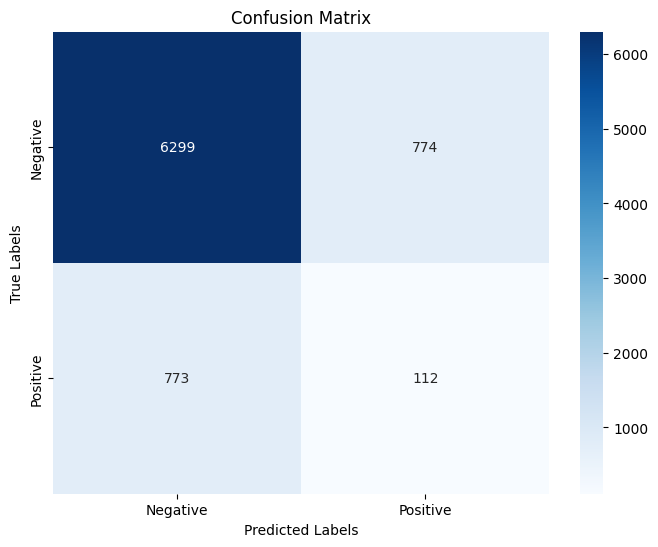

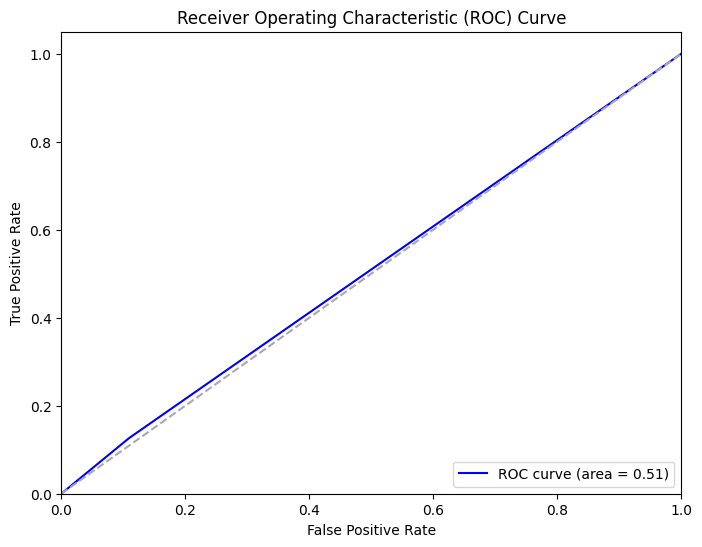

Accuracy: 0.8056044232219151
Confusion Matrix:
 [[6299  774]
 [ 773  112]]
ROC AUC Score: 0.5085617223451001
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7073
           1       0.13      0.13      0.13       885

    accuracy                           0.81      7958
   macro avg       0.51      0.51      0.51      7958
weighted avg       0.81      0.81      0.81      7958



In [97]:
evaluate_model(y_test_encoded, y_pred_dummy, y_proba_dummy)

In [98]:
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train_encoded)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


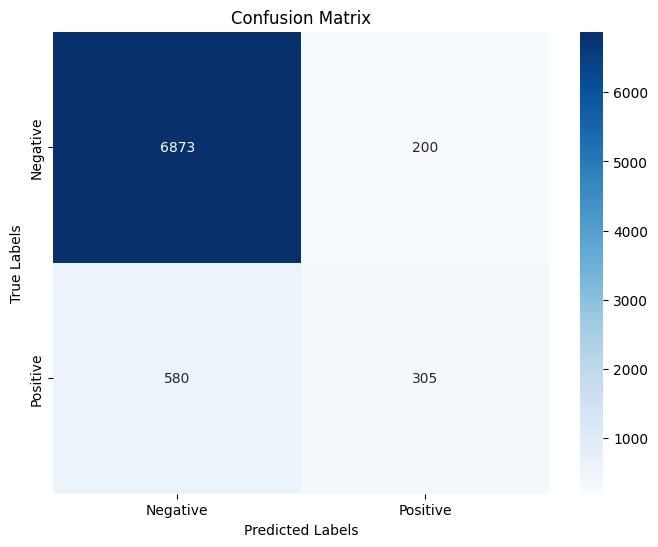

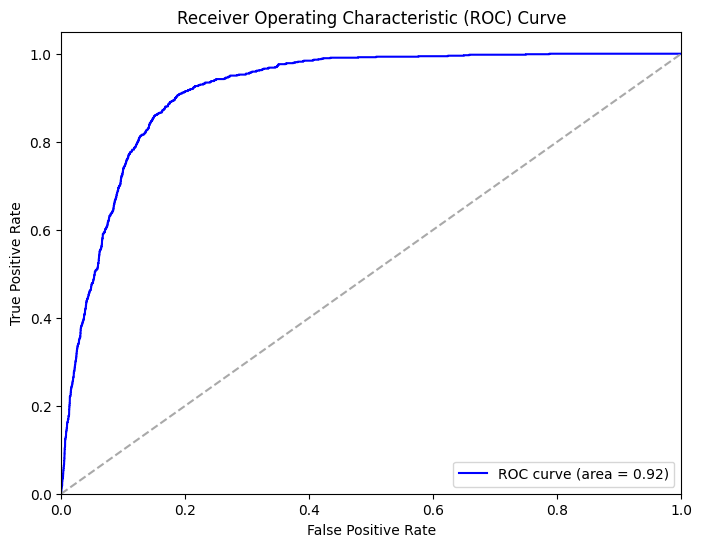

Accuracy: 0.9019854234732345
Confusion Matrix:
 [[6873  200]
 [ 580  305]]
ROC AUC Score: 0.9184218493019927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7073
           1       0.60      0.34      0.44       885

    accuracy                           0.90      7958
   macro avg       0.76      0.66      0.69      7958
weighted avg       0.89      0.90      0.89      7958



In [99]:
evaluate_model(y_test_encoded, y_pred, y_proba)

Set parameter class_weight='balanced' to increase recall for 'yes' values even causing the decrease of precision. It is more important to find all 'yes' then 'no'.

In [100]:
log_reg_imb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_reg_imb.fit(X_train, y_train_encoded)

y_pred_reg_imb = log_reg_imb.predict(X_test)
y_proba_reg_imb = log_reg_imb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

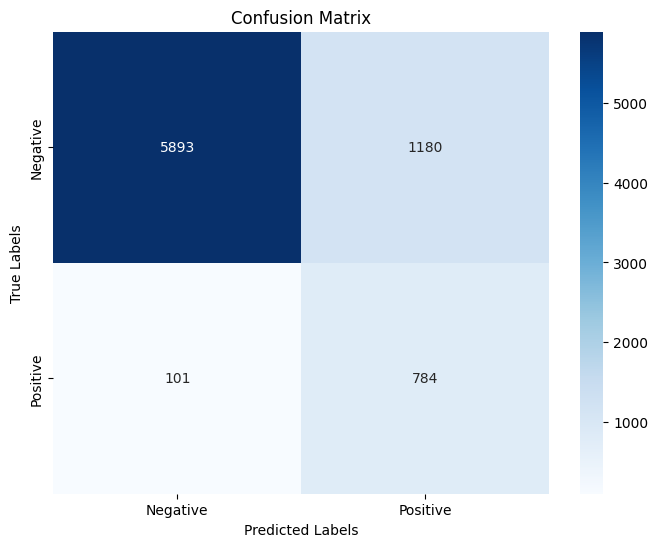

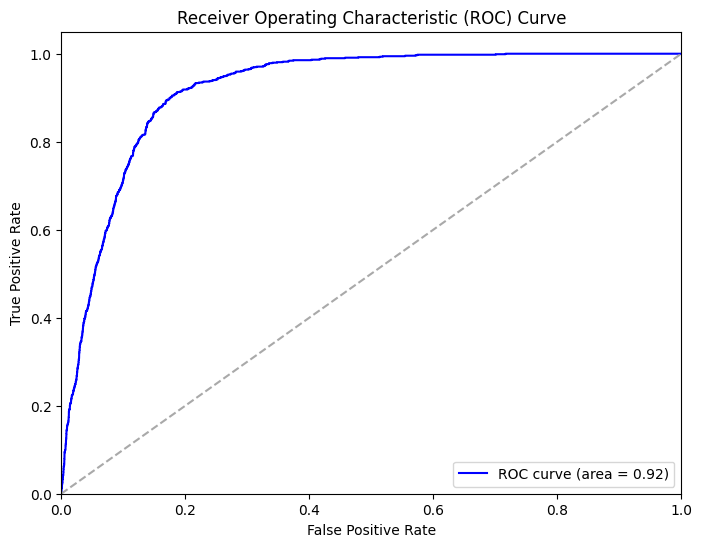

Accuracy: 0.839029907011812
Confusion Matrix:
 [[5893 1180]
 [ 101  784]]
ROC AUC Score: 0.9189442464820065
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      7073
           1       0.40      0.89      0.55       885

    accuracy                           0.84      7958
   macro avg       0.69      0.86      0.73      7958
weighted avg       0.92      0.84      0.86      7958



In [101]:
evaluate_model(y_test_encoded, y_pred_reg_imb, y_proba_reg_imb)

Now our model with parameter class_weight='balanced' found 89% of 'yes' category. But also we have low precision in case of 'yes'. It means that only 40% clients from predicted 'yes' category will have term deposit in fact

##### Models list to compare

In [102]:
# Створення списку моделей для порівняння
classifiers = [
    ('logistic_regression', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('random_forest', RandomForestClassifier(n_estimators=100, class_weight='balanced')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, learning_rate=0.1)),
    ('xgb_imb', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=len(y_train_encoded[y_train_encoded == 0]) / len(y_train_encoded[y_train_encoded == 1])))
]

In [103]:
results = []


for name, model in classifiers:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Визначення метрик для оцінювання
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='binary'),
        'recall': make_scorer(recall_score, average='binary'),
        'f1_score': make_scorer(f1_score, average='binary')
    }
    
    # Виконання перехресної перевірки
    scores = cross_validate(pipeline, X_train, y_train_encoded, cv=5, scoring=scoring)
    
    # Збереження результатів
    results.append({
        'name': name,
        'accuracy': scores['test_accuracy'].mean(),
        'precision': scores['test_precision'].mean(),
        'recall': scores['test_recall'].mean(),
        'f1_score': scores['test_f1_score'].mean()
    })
    
    # Вивід результатів
    print(f"{name}:")
    print(f" Mean CV Accuracy = {scores['test_accuracy'].mean():.4f}")
    print(f" Mean CV Precision = {scores['test_precision'].mean():.4f}")
    print(f" Mean CV Recall = {scores['test_recall'].mean():.4f}")
    print(f" Mean CV F1-Score = {scores['test_f1_score'].mean():.4f}")

logistic_regression:
 Mean CV Accuracy = 0.8380
 Mean CV Precision = 0.4019
 Mean CV Recall = 0.8839
 Mean CV F1-Score = 0.5525
random_forest:
 Mean CV Accuracy = 0.9075
 Mean CV Precision = 0.6366
 Mean CV Recall = 0.4241
 Mean CV F1-Score = 0.5086
xgb:
 Mean CV Accuracy = 0.9128
 Mean CV Precision = 0.6437
 Mean CV Recall = 0.5149
 Mean CV F1-Score = 0.5718
xgb_imb:
 Mean CV Accuracy = 0.8848
 Mean CV Precision = 0.4944
 Mean CV Recall = 0.8059
 Mean CV F1-Score = 0.6128


In [104]:
results

[{'name': 'logistic_regression',
  'accuracy': 0.8380093233914756,
  'precision': 0.4018566781452323,
  'recall': 0.8839162428725535,
  'f1_score': 0.5525006280919288},
 {'name': 'random_forest',
  'accuracy': 0.9075373615577057,
  'precision': 0.6366388265874843,
  'recall': 0.4240553243951302,
  'f1_score': 0.5086453487762996},
 {'name': 'xgb',
  'accuracy': 0.912846867404137,
  'precision': 0.6436910130427959,
  'recall': 0.5148605332100477,
  'f1_score': 0.5718025698168216},
 {'name': 'xgb_imb',
  'accuracy': 0.8847906555816583,
  'precision': 0.494360436338866,
  'recall': 0.8058934350439205,
  'f1_score': 0.6127693471406291}]

In [105]:

# Створення XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, learning_rate=0.1)

# Інтеграція XGBoost у pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Використання вже визначеного preprocessor
    ('classifier', xgb_classifier)
])

# Навчання моделі
xgb_pipeline.fit(X_train, y_train_encoded)

# Передбачення результатів
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1] 

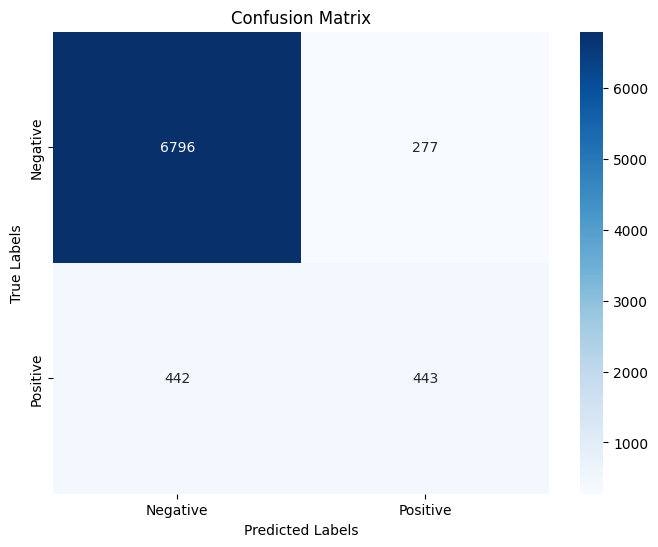

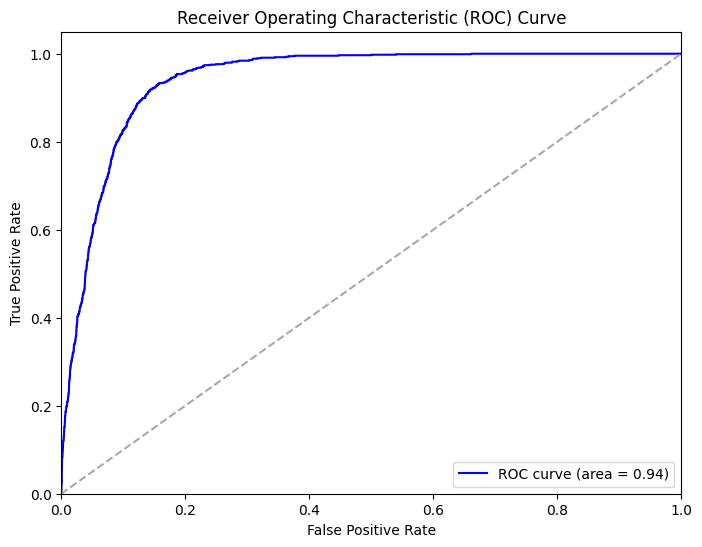

Accuracy: 0.9096506659964815
Confusion Matrix:
 [[6796  277]
 [ 442  443]]
ROC AUC Score: 0.9414742623536149
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7073
           1       0.62      0.50      0.55       885

    accuracy                           0.91      7958
   macro avg       0.78      0.73      0.75      7958
weighted avg       0.90      0.91      0.91      7958



In [106]:
evaluate_model(y_test_encoded, y_pred_xgb, y_proba_xgb)

In [107]:

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=len(y_train_encoded[y_train_encoded == 0]) / len(y_train_encoded[y_train_encoded == 1]))

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

xgb_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [108]:
# Передбачення результатів
y_pred_xgb_w = xgb_pipeline.predict(X_test)
y_proba_xgb_w = xgb_pipeline.predict_proba(X_test)[:, 1] 

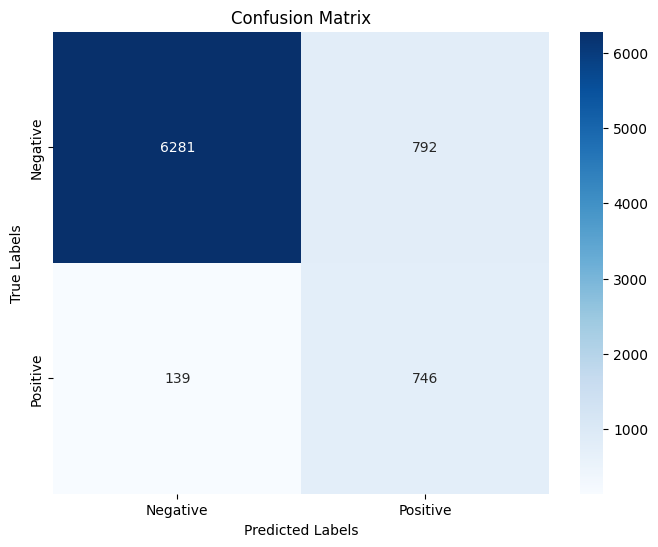

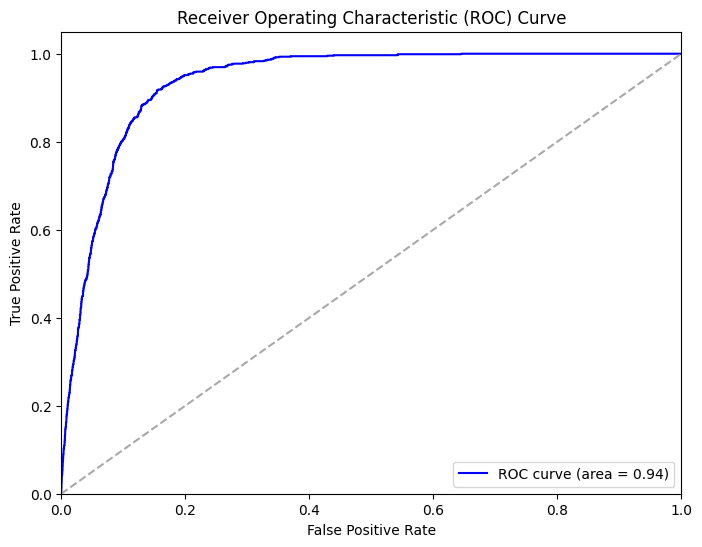

Accuracy: 0.8830108067353607
Confusion Matrix:
 [[6281  792]
 [ 139  746]]
ROC AUC Score: 0.936637215926564
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      7073
           1       0.49      0.84      0.62       885

    accuracy                           0.88      7958
   macro avg       0.73      0.87      0.77      7958
weighted avg       0.92      0.88      0.90      7958



In [109]:
evaluate_model(y_test_encoded, y_pred_xgb_w, y_proba_xgb_w)

In [110]:
!pip install -q imblearn

In [111]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# SMOTE
imb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=len(y_train_encoded[y_train_encoded == 0]) / len(y_train_encoded[y_train_encoded == 1])))
])

imb_pipeline.fit(X_train, y_train_encoded)

y_pred_imb = imb_pipeline.predict(X_test)
y_proba_imb = imb_pipeline.predict_proba(X_test)[:, 1] 

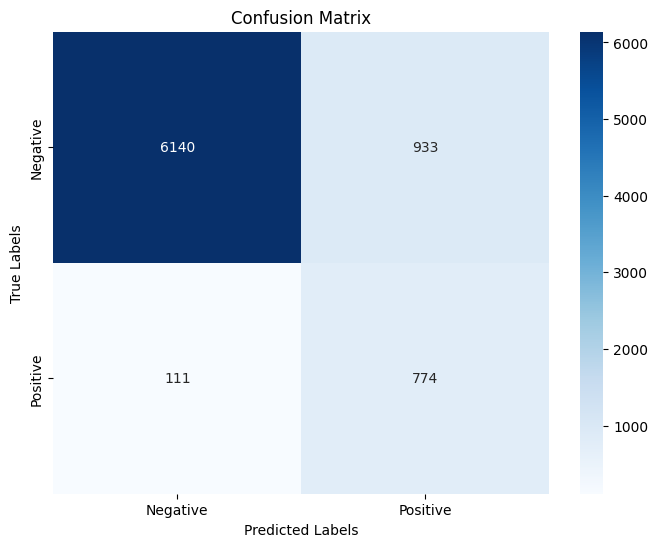

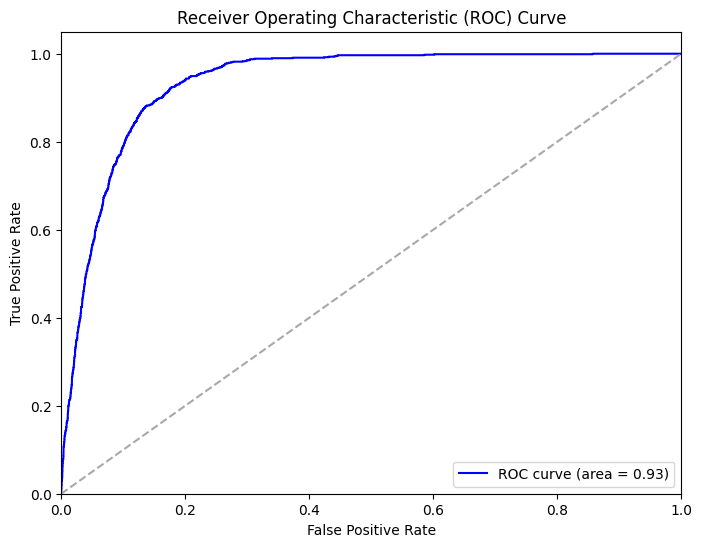

Accuracy: 0.8688112591103292
Confusion Matrix:
 [[6140  933]
 [ 111  774]]
ROC AUC Score: 0.9340757923223589
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      7073
           1       0.45      0.87      0.60       885

    accuracy                           0.87      7958
   macro avg       0.72      0.87      0.76      7958
weighted avg       0.92      0.87      0.89      7958



In [112]:
evaluate_model(y_test_encoded, y_pred_imb, y_proba_imb)

For now 3 the best models are:
+  LogisticRegression(max_iter=1000, class_weight='balanced')
+  XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=len(y_train_encoded[y_train_encoded == 0]) / len(y_train_encoded[y_train_encoded == 1])+SMOTE
+ XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=len(y_train_encoded[y_train_encoded == 0]) / len(y_train_encoded[y_train_encoded == 1]) without SMOTE

Hyperparameter tunning? Transformers for numerical columns?